DS PROJECT

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset
data = pd.read_csv('PakistanLargestEcommerceDataset.csv')

# Overview of dataset structure and columns
print("Dataset Info:")
print(data.info())
print("\nColumn Names:", data.columns.tolist())

# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# Basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(data.describe(include='all'))

C:\Users\abdul\AppData\Local\Temp\ipykernel_15148\386711791.py:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('PakistanLargestEcommerceDataset.csv')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                 

In [30]:
# Convert columns with possible mixed types (e.g., 'price' and 'grand_total') to numeric, handling errors
for col in ['price', 'qty_ordered', 'grand_total']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handling missing values
data = data.dropna(subset=['price', 'qty_ordered', 'grand_total'])  # Drop rows with NaNs in key columns
data.loc[:,"sales_commission_code"] = data["sales_commission_code"].fillna("\\N")
data = data.drop(["Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25"], axis = 1)
data = data.dropna()
data = data.loc[data["category_name_1"] != '\\N']
# Removing duplicates
data = data.drop_duplicates()
print("Duplicates removed:", data.duplicated().sum())

print("\nCleaned Data Info:")
print(data.info())

Duplicates removed: 0

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 576481 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                576481 non-null  float64
 1   status                 576481 non-null  object 
 2   created_at             576481 non-null  object 
 3   sku                    576481 non-null  object 
 4   price                  576481 non-null  float64
 5   qty_ordered            576481 non-null  float64
 6   grand_total            576481 non-null  float64
 7   increment_id           576481 non-null  object 
 8   category_name_1        576481 non-null  object 
 9   sales_commission_code  576481 non-null  object 
 10  discount_amount        576481 non-null  float64
 11  payment_method         576481 non-null  object 
 12  Working Date           576481 non-null  object 
 13  BI Status              576481 non-null  object 
 14 

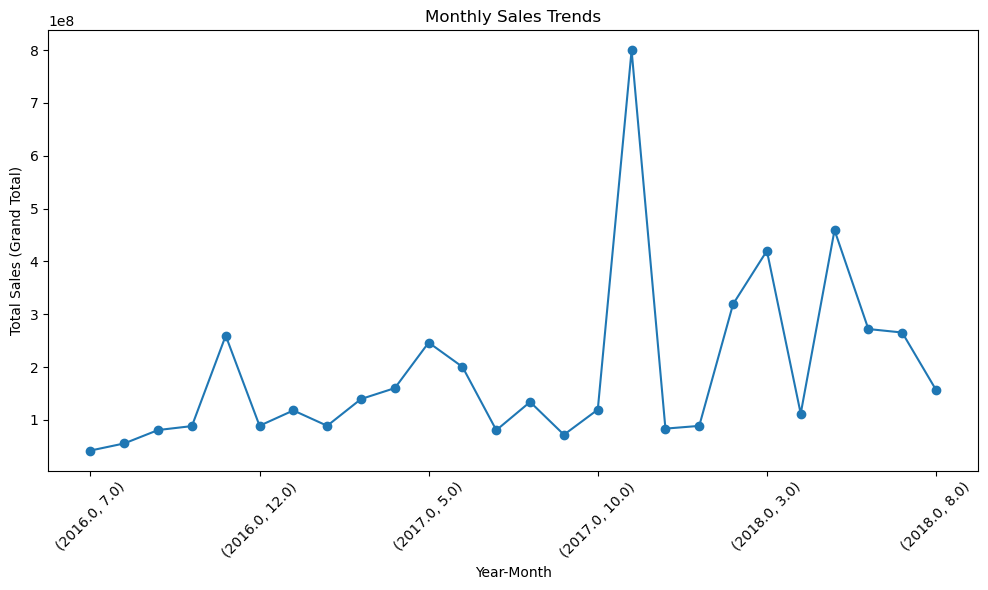

In [31]:
# Monthly sales trend analysis
monthly_sales = data.groupby(['Year', 'Month'])['grand_total'].sum()
# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (Grand Total)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

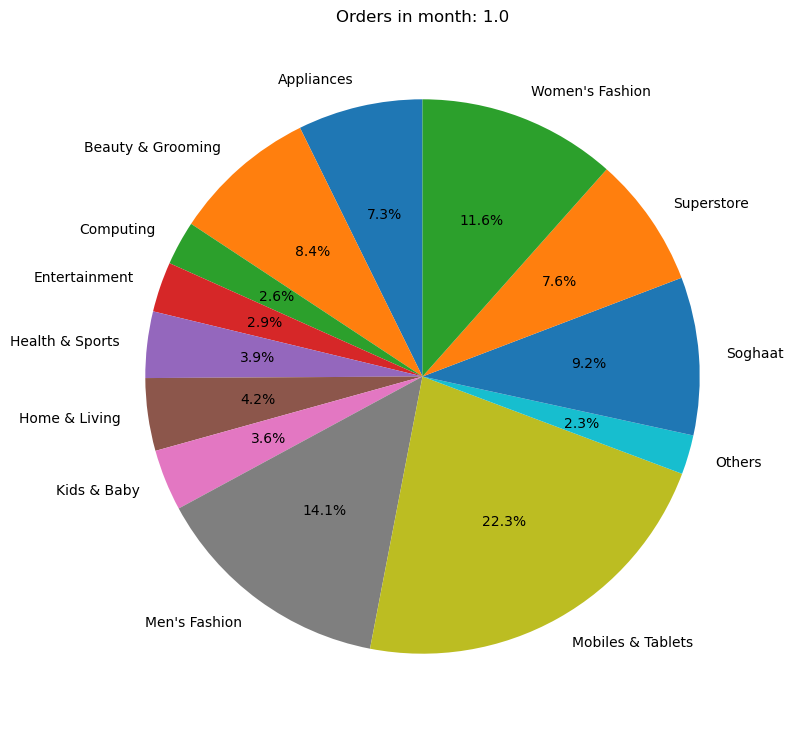

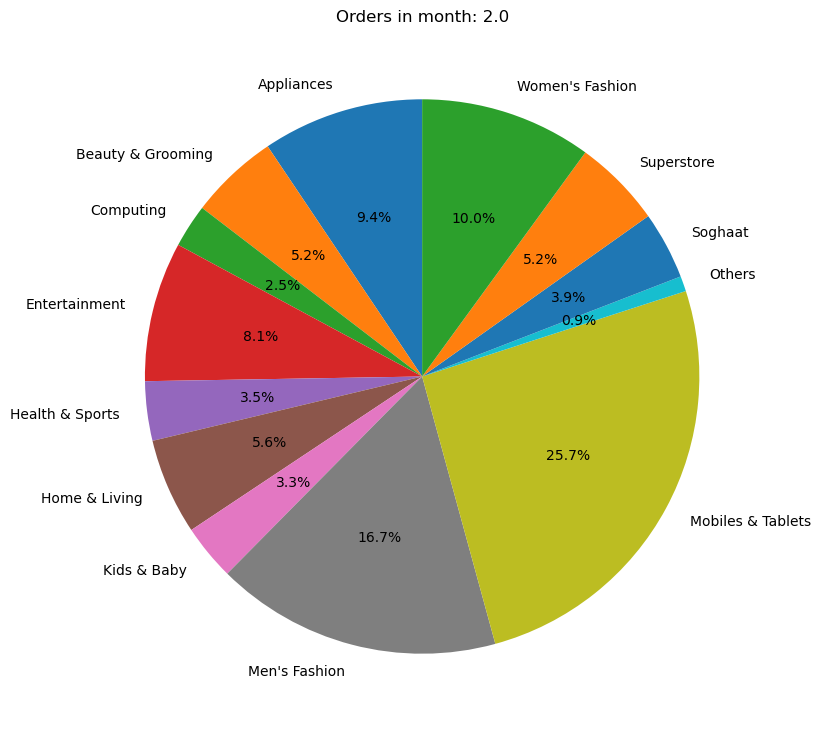

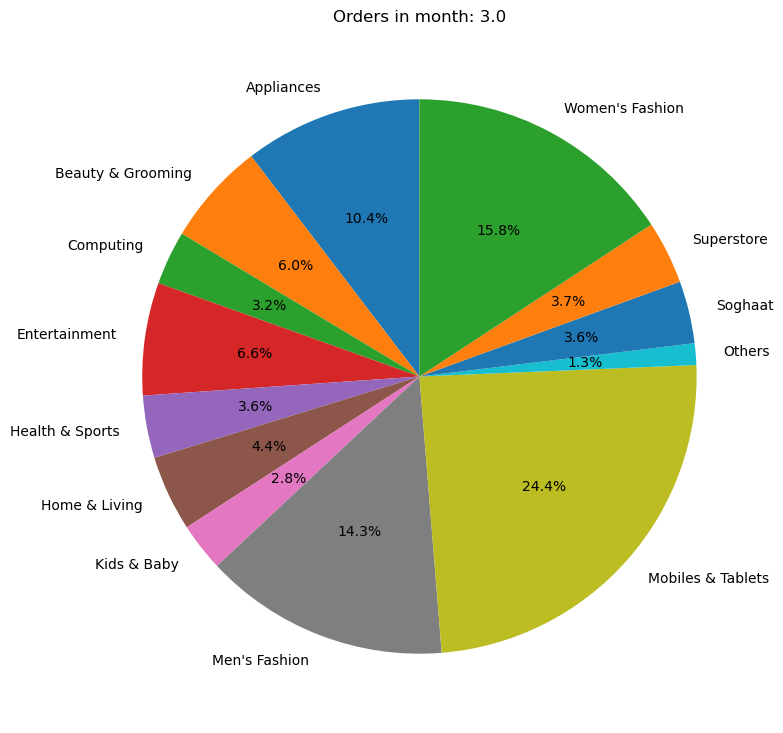

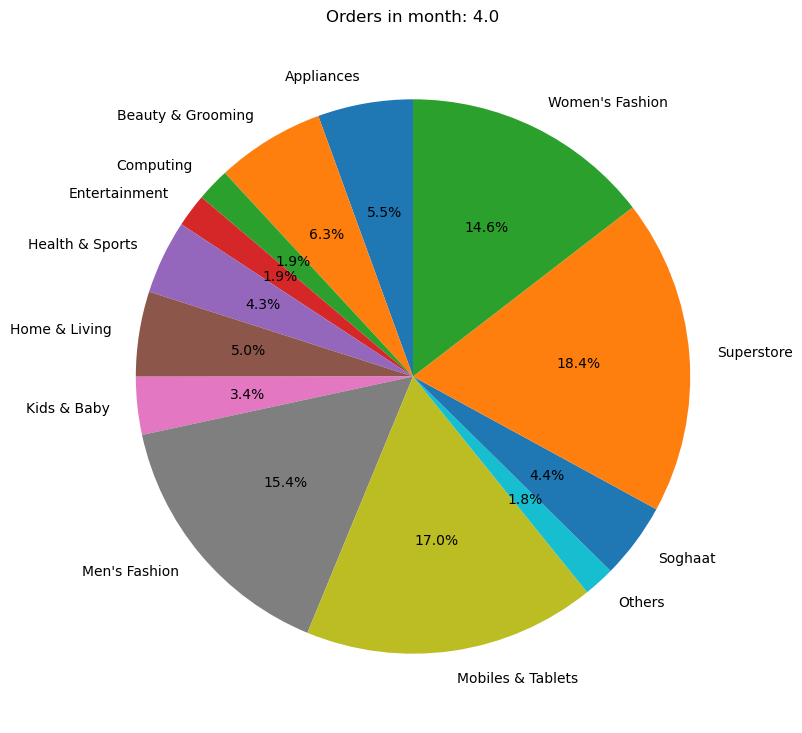

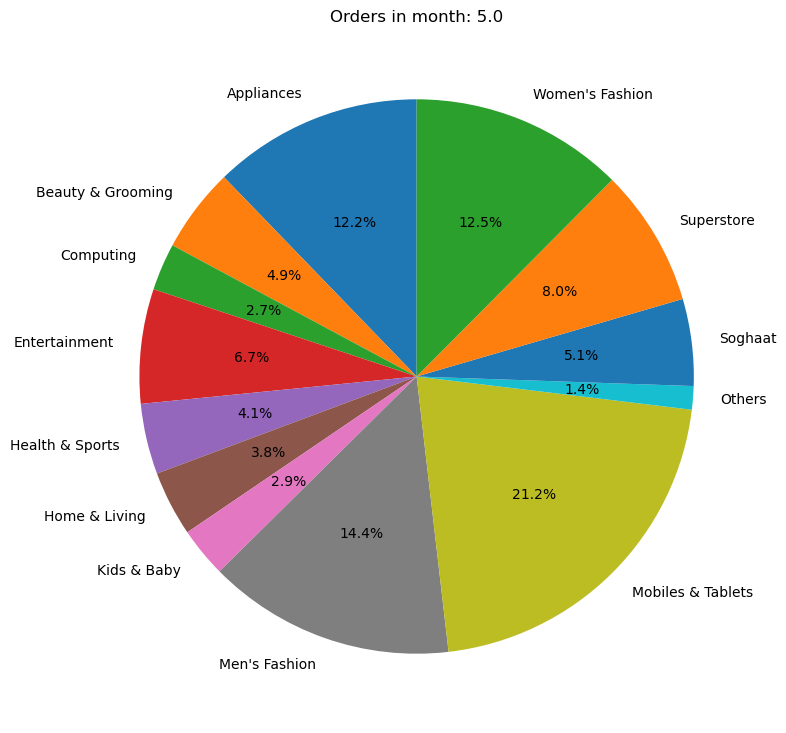

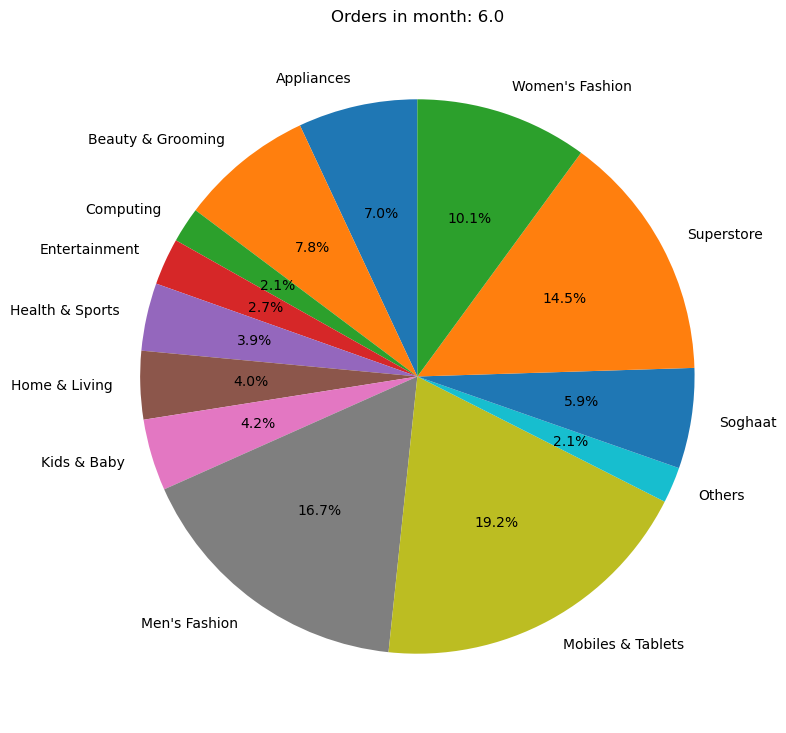

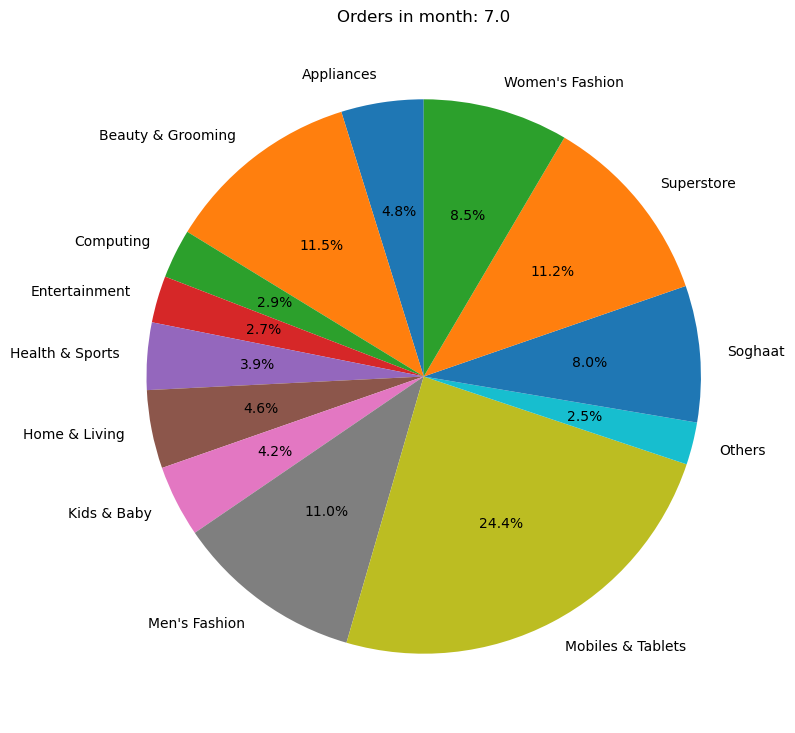

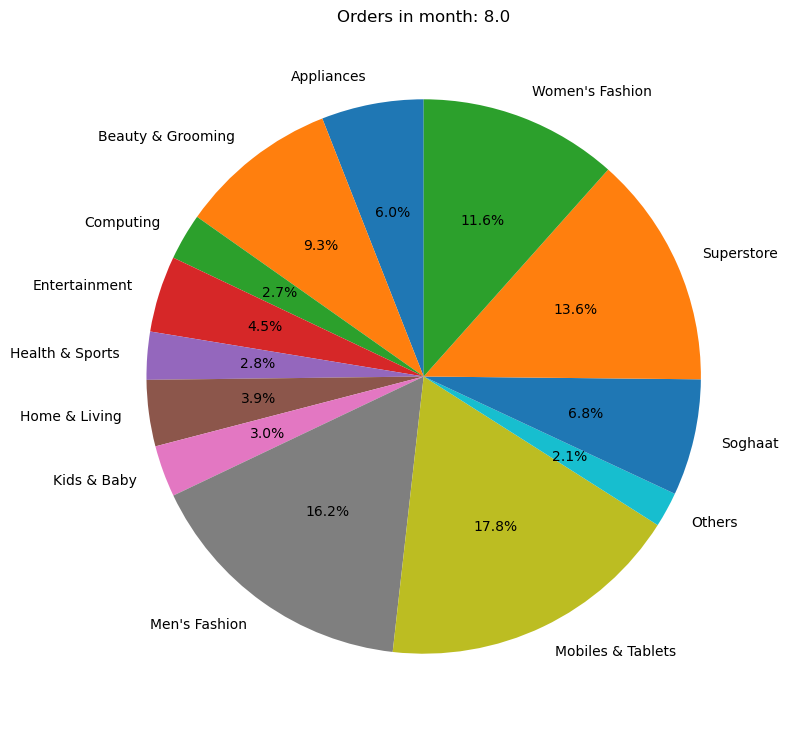

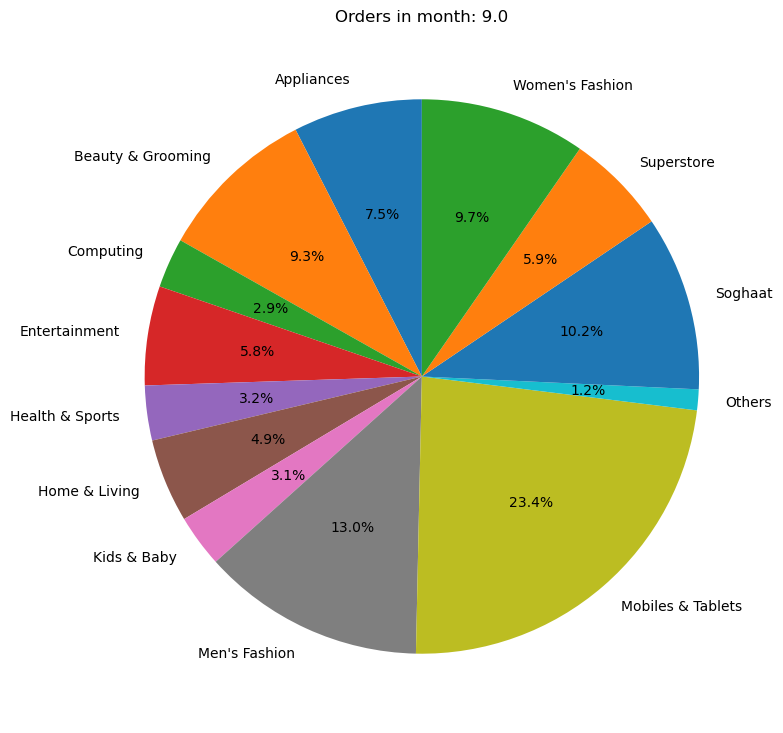

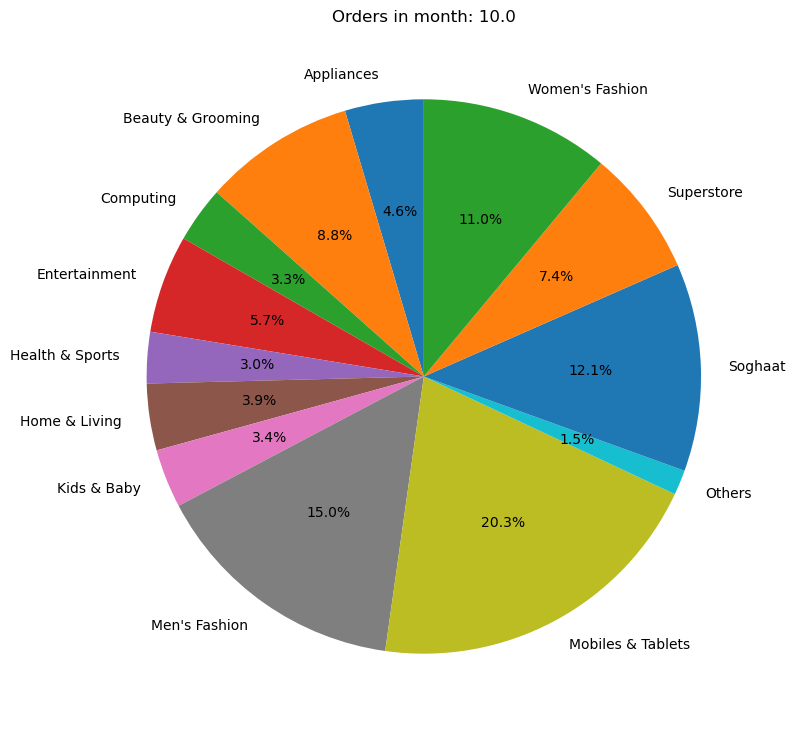

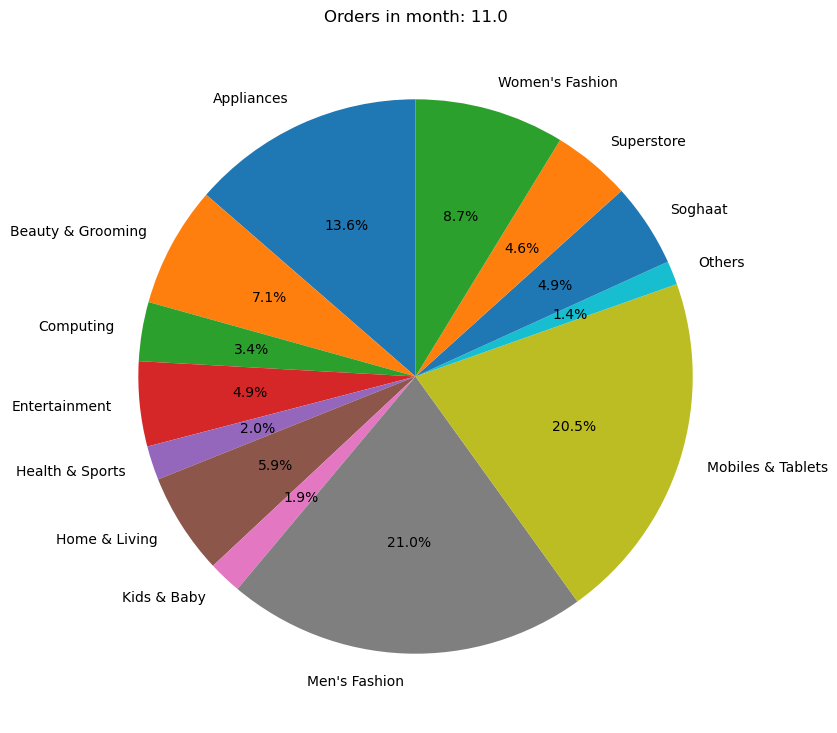

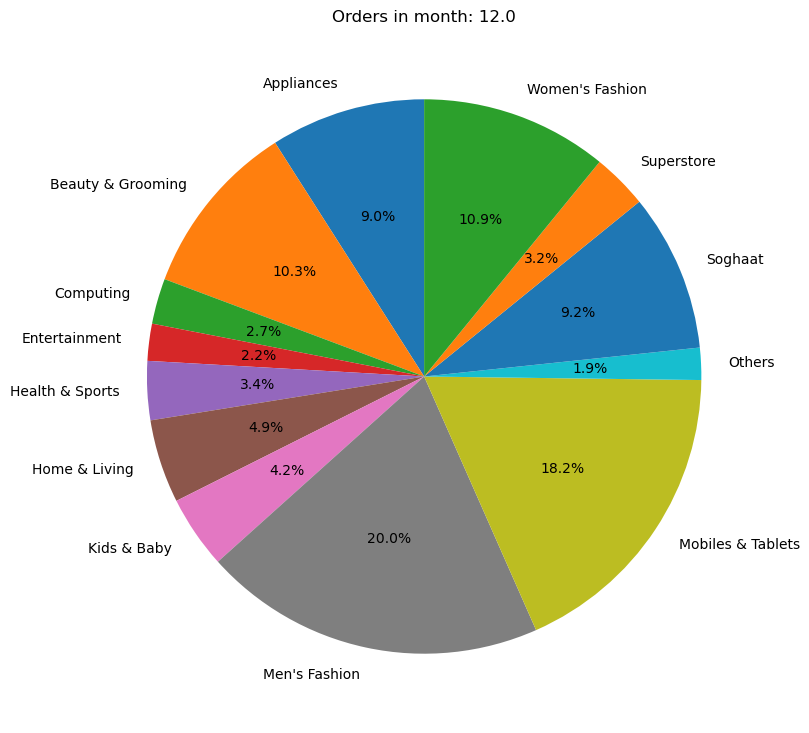

In [32]:
table = data.pivot_table(values='item_id', index='Month', columns='category_name_1', aggfunc='count')
c = 1
for i in table.index:
  plt.figure(figsize = (9,9))
  ind = table.loc[i]/table.loc[i].sum() < 0.015
  dumy = table.loc[i]
  dumy["Others"] = dumy[ind].sum()
  ind["Others"] = False
  plt.pie(dumy[~ind], labels=table.columns[~ind], autopct='%1.1f%%', startangle=90)
  plt.title(f"Orders in month: {i}")

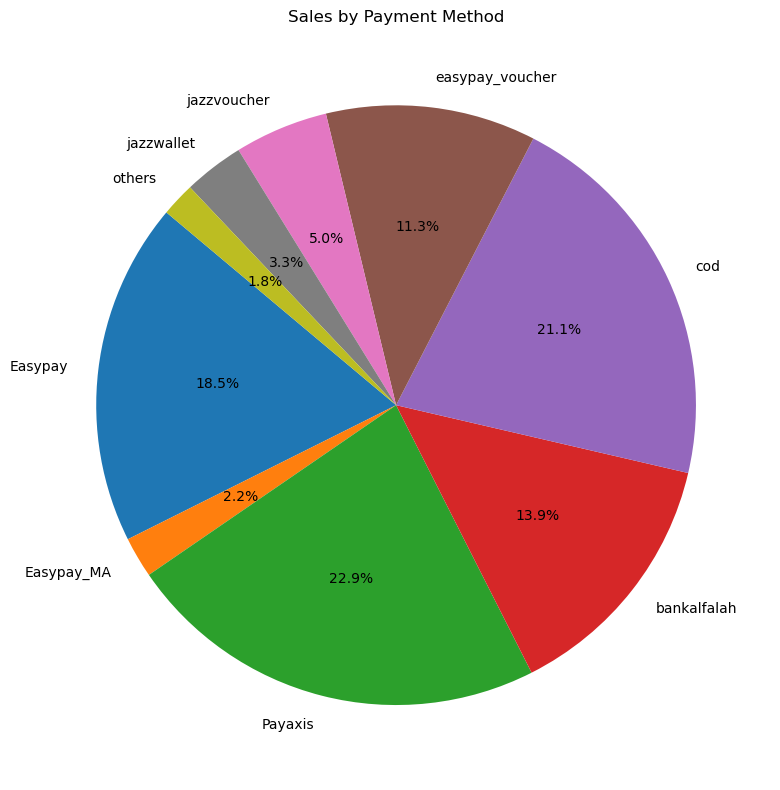

In [33]:
# Sales by payment method
payment_sales = data.groupby('payment_method')['grand_total'].sum()
ind = payment_sales/payment_sales.sum() < 0.01
n_s = pd.Series([payment_sales[ind].sum()], index = ["others"])
payment_sales = payment_sales[~ind]
payment_sales = pd.concat([payment_sales, n_s])
# Plotting sales by payment method
plt.figure(figsize=(8, 8))
payment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sales by Payment Method")
plt.ylabel("")  # Hide the y-axis label for better visualization
plt.tight_layout()
plt.show()

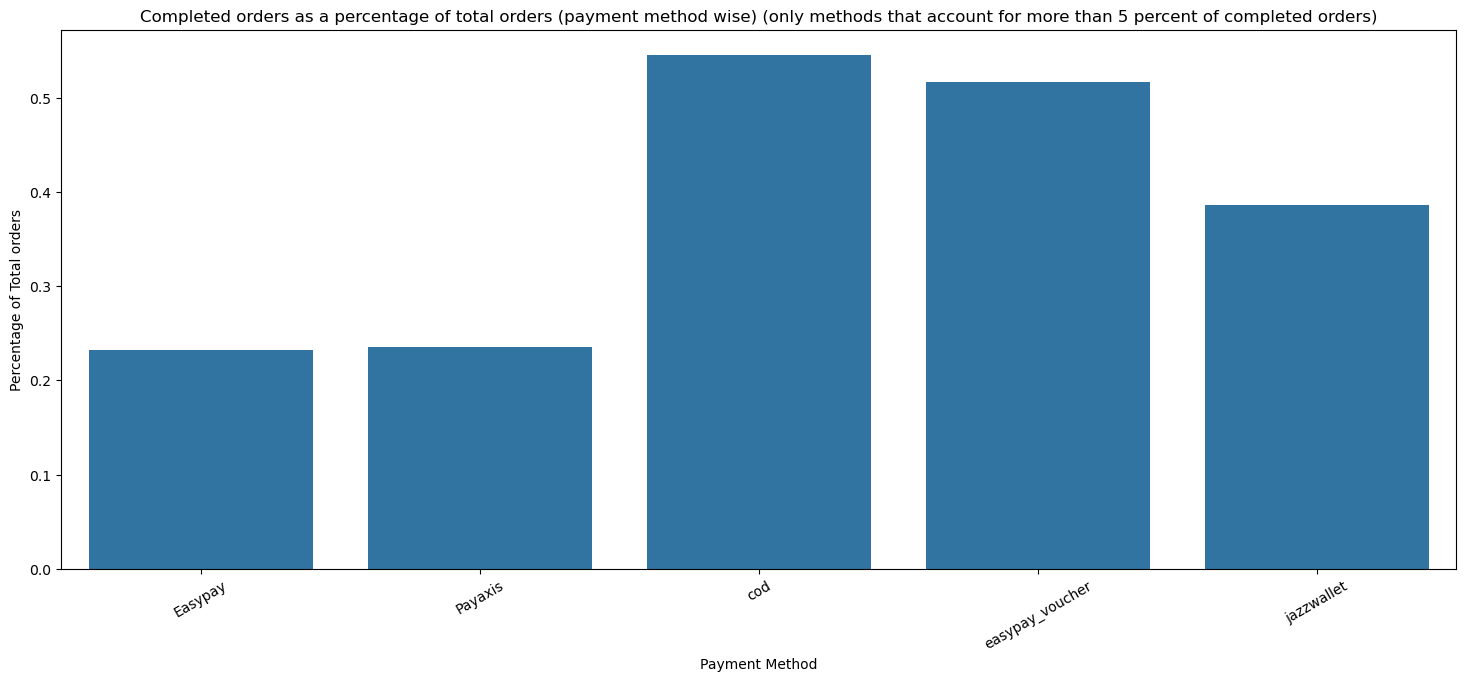

In [34]:

new_df = (data.loc[data["status"] == "complete"].groupby("payment_method")["item_id"].count()).astype(float)
ind = new_df/new_df.sum() < 0.05
new_df = new_df[~ind]
dummy_df = data.groupby("payment_method")["item_id"].count()
new_df[new_df.index] = (new_df.values / dummy_df[new_df.index].values).astype(float)

plt.figure(figsize=(18,7))
plt.xticks(rotation = 30)
sns.barplot(x=new_df.index, y=new_df.values)
plt.title("Completed orders as a percentage of total orders (payment method wise) (only methods that account for more than 5 percent of completed orders)")
plt.xlabel("Payment Method")
plt.ylabel("Percentage of Total orders")
plt.show()

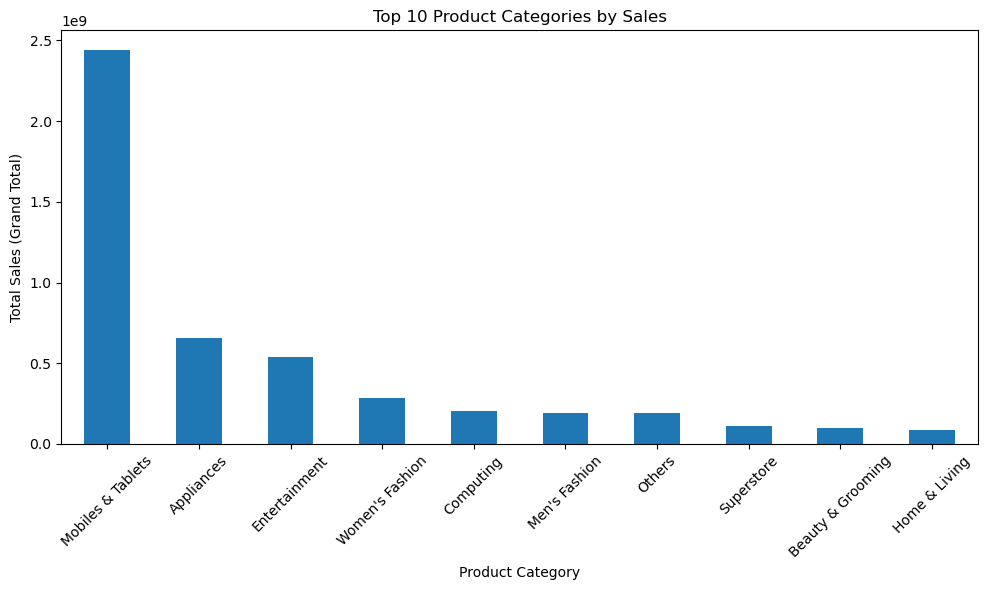

In [35]:
# Product category performance analysis
category_performance = data.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).head(10)

# Plotting top product categories
plt.figure(figsize=(10, 6))
category_performance.plot(kind='bar')
plt.title("Top 10 Product Categories by Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (Grand Total)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#explanation for the code block and plots below

**we see yearly breakdown of product categories both interms of sales and order count. we observe that in terms of count Men's fashion is also an extremely important category.
Note: Do not compare orders of a category for different years, The data available does not include the same number of months for all years. inter-category comparison for a same year is valid. We are looking into the trends in categories and not temporal trends, so it should not make a big difference.**

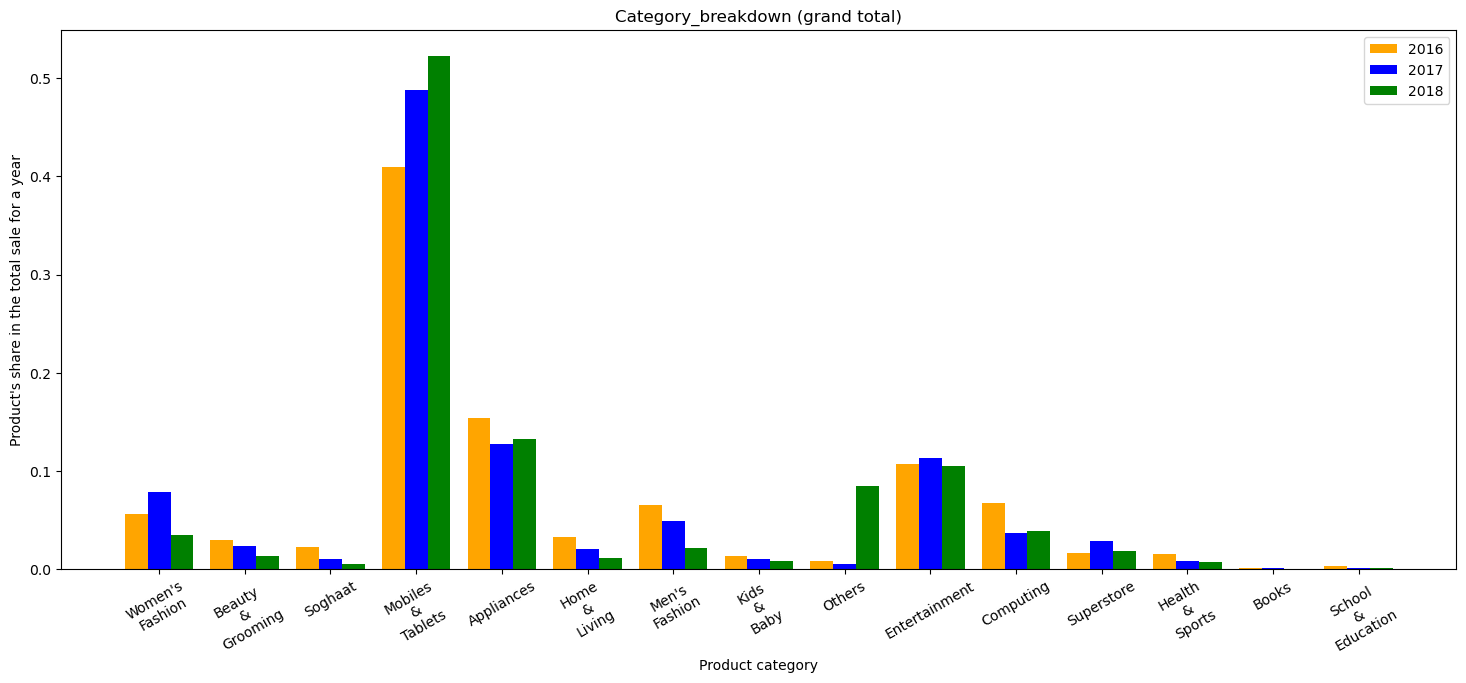

In [36]:
data["category_name_1"] = data["category_name_1"].str.replace(" ", "\n")
#seperate data by year
data_16 = data.loc[data["Year"] == 2016]
data_17 = data.loc[data["Year"] == 2017]
data_18 = data.loc[data["Year"] == 2018]
unique_methods = data["category_name_1"].unique()

#share of each catgeory in total sales for year 2016
temp = data_16.groupby("category_name_1")["grand_total"].sum()/data_16["grand_total"].sum()
sr_16 = pd.Series(0.0,index= unique_methods)
sr_16[temp.index] = temp[temp.index]

#share of each catgeory in total sales for year 2017
sr_17 = pd.Series(0.0,index= unique_methods)
temp = data_17.groupby("category_name_1")["grand_total"].sum()/data_17["grand_total"].sum()
sr_17[temp.index] = temp[temp.index]

#share of each catgeory in total sales for year 2018
sr_18 = pd.Series(0.0,index= unique_methods)
temp = data_18.groupby("category_name_1")["grand_total"].sum()/data_18["grand_total"].sum()
sr_18[temp.index] = temp[temp.index]


plt.figure(figsize=(18,7))
plt.xticks(rotation = 30)


width = 0.8
bar1 = [3*i for i in range(len(unique_methods))]
bar2 = [i + width for i in bar1]
bar3 = [i + width for i in bar2]
plt.bar(bar1, sr_16.values,width, label = "2016", color="orange")
plt.bar(bar2, sr_17.values,width, label = "2017" , color="blue")
plt.bar(bar3, sr_18.values,width, label = "2018", color="green")
plt.xticks(bar2, unique_methods)
plt.title("Category_breakdown (grand total)")
plt.xlabel("Product category")
plt.ylabel("Product's share in the total sale for a year")
plt.legend()
plt.show()

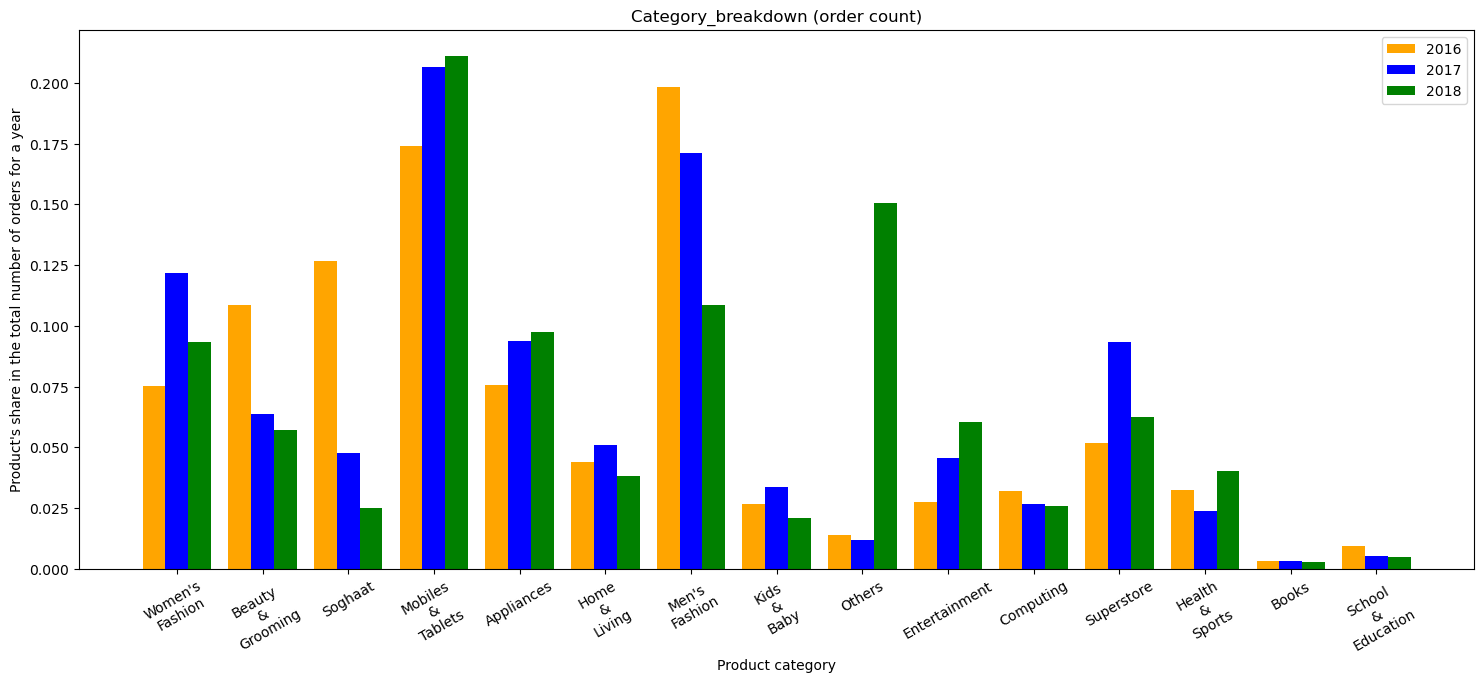

In [37]:
data["category_name_1"] = data["category_name_1"].str.replace(" ", "\n")
#seperate data for each year
data_16 = data.loc[data["Year"] == 2016]
data_17 = data.loc[data["Year"] == 2017]
data_18 = data.loc[data["Year"] == 2018]
unique_methods = data["category_name_1"].unique()

#share of each category in 2016
temp = data_16.groupby("category_name_1")["grand_total"].count()/data_16["grand_total"].count()
sr_16 = pd.Series(0.0,index= unique_methods)
sr_16[temp.index] = temp[temp.index]

#share of each category in 2017
sr_17 = pd.Series(0.0,index= unique_methods)
temp = data_17.groupby("category_name_1")["grand_total"].count()/data_17["grand_total"].count()
sr_17[temp.index] = temp[temp.index]

#share of each category in 2018
sr_18 = pd.Series(0.0,index= unique_methods)
temp = data_18.groupby("category_name_1")["grand_total"].count()/data_18["grand_total"].count()
sr_18[temp.index] = temp[temp.index]


plt.figure(figsize=(18,7))
plt.xticks(rotation = 30)

width = 0.8
bar1 = [3*i for i in range(len(unique_methods))]
bar2 = [i + width for i in bar1]
bar3 = [i + width for i in bar2]
plt.bar(bar1, sr_16.values,width, label = "2016", color="orange")
plt.bar(bar2, sr_17.values,width, label = "2017" , color="blue")
plt.bar(bar3, sr_18.values,width, label = "2018", color="green")
plt.xticks(bar2, unique_methods)
plt.title("Category_breakdown (order count)")
plt.xlabel("Product category")
plt.ylabel("Product's share in the total number of orders for a year")
plt.legend()
plt.show()

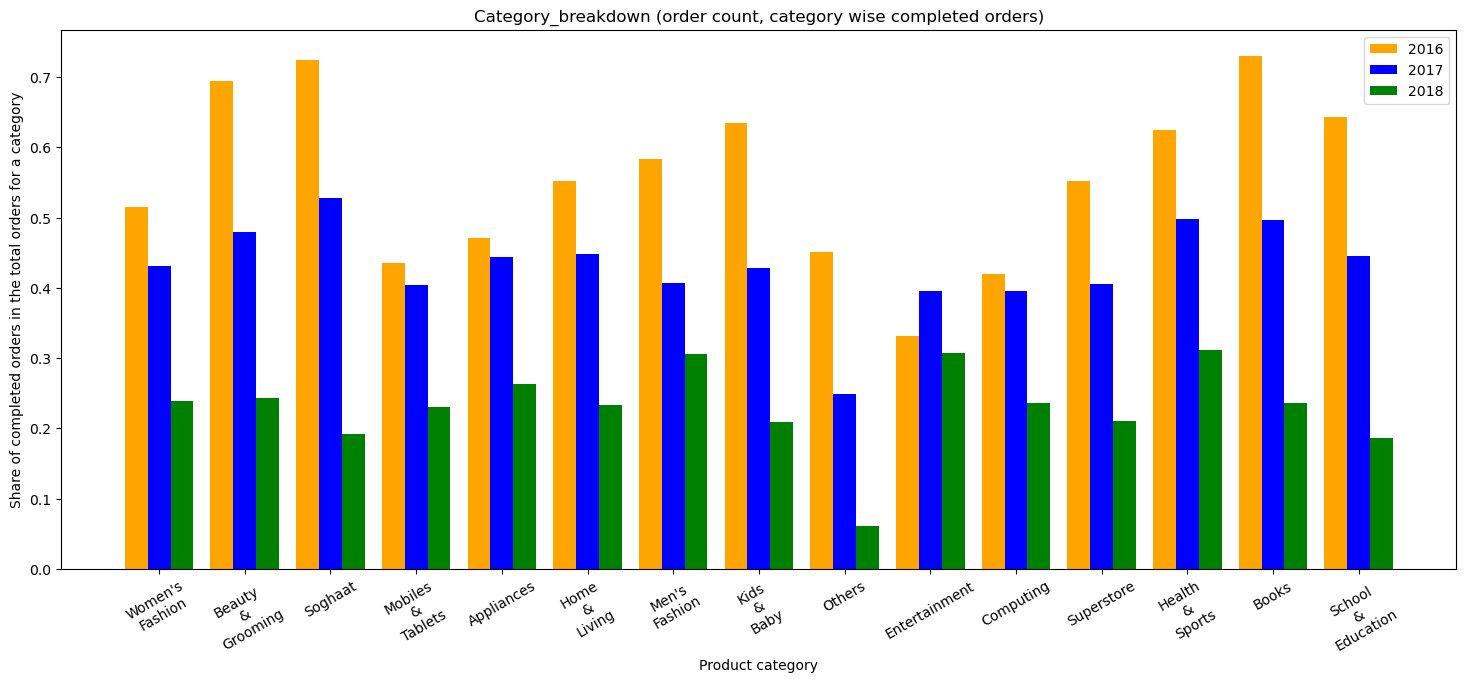

In [38]:
#for better visibility at the x axis
data["category_name_1"] = data["category_name_1"].str.replace(" ", "\n")
#seperating data for different years with complete status
data_16 = data.loc[(data["Year"] == 2016) & (data["status"] == "complete")]
data_17 = data.loc[(data["Year"] == 2017) & (data["status"] == "complete")]
data_18 = data.loc[(data["Year"] == 2018) & (data["status"] == "complete")]

#seperating data for years and counting number of orders for each category per year
data_16r = data.loc[(data["Year"] == 2016)].groupby("category_name_1")["grand_total"].count()
data_17r = data.loc[(data["Year"] == 2017)].groupby("category_name_1")["grand_total"].count()
data_18r = data.loc[(data["Year"] == 2018)].groupby("category_name_1")["grand_total"].count()

#not all categories have a completed order each year, so to remedy that
unique_methods = data["category_name_1"].unique()
temp = data_16.groupby("category_name_1")["grand_total"].count()
#finding percentage of completed orders for each catgeory for this particular year
temp = temp[temp.index]/data_16r[temp.index]
sr_16 = pd.Series(0.0,index= unique_methods)
sr_16[temp.index] = temp[temp.index]

#same as above for 2017
sr_17 = pd.Series(0.0,index= unique_methods)
temp = data_17.groupby("category_name_1")["grand_total"].count()
temp = temp[temp.index]/data_17r[temp.index]
sr_17[temp.index] = temp[temp.index]

#same as above for 2018
sr_18 = pd.Series(0.0,index= unique_methods)
temp = data_18.groupby("category_name_1")["grand_total"].count()
temp = temp[temp.index]/data_18r[temp.index]
sr_18[temp.index] = temp[temp.index]

plt.figure(figsize=(18,7))
plt.xticks(rotation = 30)

width = 0.8
bar1 = [3*i for i in range(len(unique_methods))]
bar2 = [i + width for i in bar1]
bar3 = [i + width for i in bar2]
plt.bar(bar1, sr_16.values,width, label = "2016", color="orange")
plt.bar(bar2, sr_17.values,width, label = "2017" , color="blue")
plt.bar(bar3, sr_18.values,width, label = "2018", color="green")
plt.xticks(bar2, unique_methods)
plt.title("Category_breakdown (order count, category wise completed orders)")
plt.xlabel("Product category")
plt.ylabel("Share of completed orders in the total orders for a category")
plt.legend()
plt.show()

#Explanation for the codeblock and plots below

**The bar chart below shows how the cartsize of orders in particular categories change given the precence of discount and sales commission code incomparison to thier absence. Some products do better with one in comparison to other**

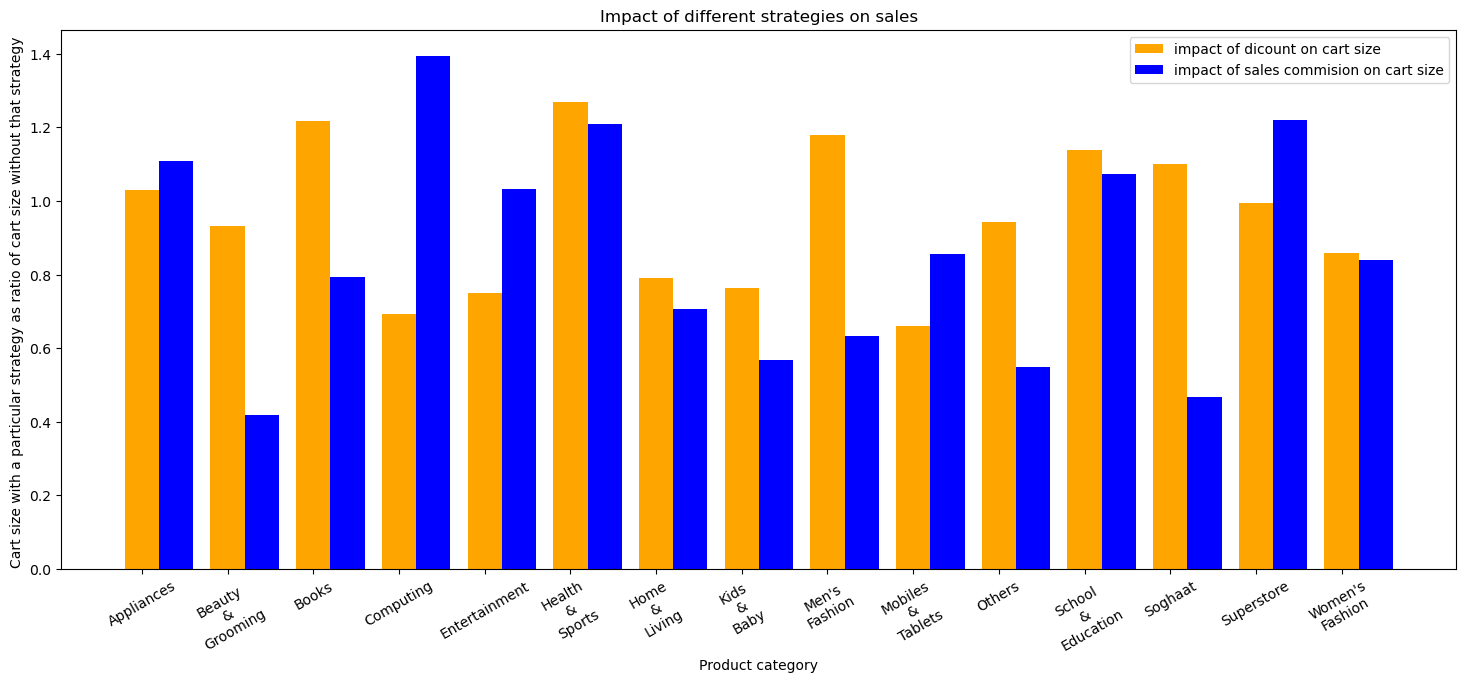

In [39]:
#grouping by product categories, with discount and finding mean "grandtotal"
new_df = (data.loc[data["discount_amount"] > 0].groupby("category_name_1")["grand_total"].mean()).astype(float)
#grouping by product categories, without discount and finding mean "grandtotal"
dummy_df = data.loc[data["discount_amount"] == 0].groupby("category_name_1")["grand_total"].mean()
#finding the required ratio, use index to ensure correctness
new_df[new_df.index] = (new_df[new_df.index].values / dummy_df[new_df.index].values).astype(float)

#same process but for sales_commission
new_df1 = (data.loc[data["sales_commission_code"] != "\\N"].groupby("category_name_1")["grand_total"].mean()).astype(float)
dummy_df1 = data.loc[data["sales_commission_code"] == "\\N"].groupby("category_name_1")["grand_total"].mean()
new_df1[new_df.index] = (new_df1[new_df.index].values / dummy_df1[new_df.index].values).astype(float)

#creating two lists, so can plot them together
width = 0.8
bar1 = [i *2 for i in range(len(new_df1))]
bar2 = [i+width for i in bar1]

plt.figure(figsize=(18,7))
plt.xticks(rotation = 30)
plt.bar( bar1,new_df.values,label = "impact of dicount on cart size", color = "orange")
plt.bar( bar2,new_df1.values,label = "impact of sales commision on cart size", color = "blue")
#changing x axis, putting catgeories at the locations for bar1
plt.xticks(bar1, new_df.index)
plt.title("Impact of different strategies on sales")
plt.legend()
plt.xlabel("Product category")
plt.ylabel("Cart size with a particular strategy as ratio of cart size without that strategy ")
plt.show()

#explanation for the code block and plots below

**Temporal data of customer aquisition. Data generated by looking into the first order placed by a customer (unique customer ids)**

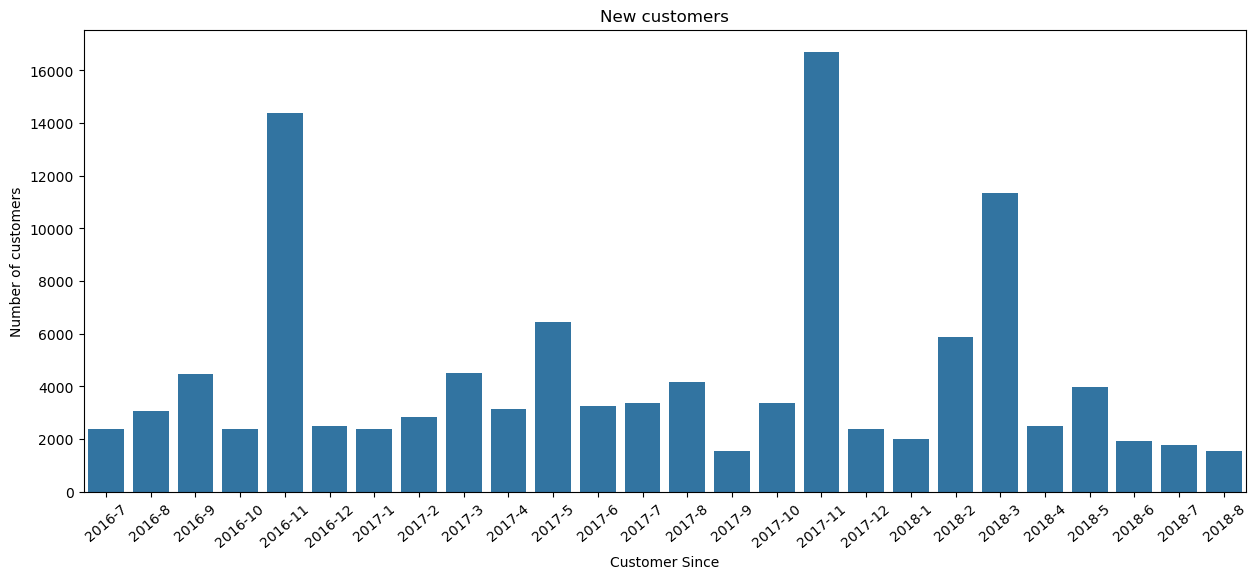

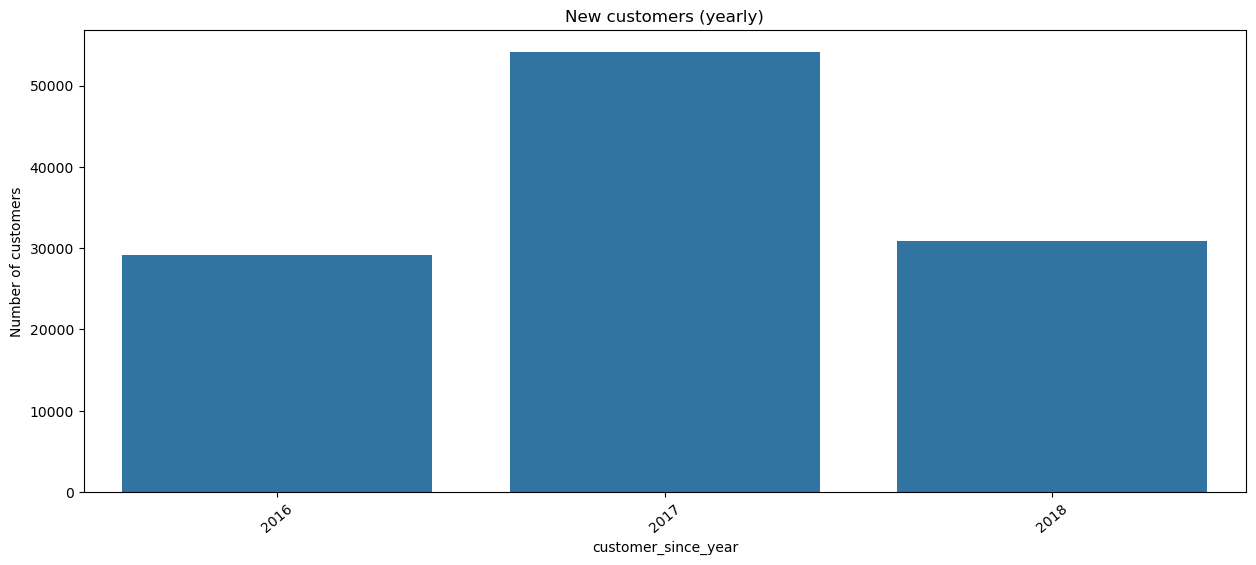

In [40]:
#make data frame such that only one entryfor each client
new_customer = data.groupby("Customer ID")[["Customer Since"]].agg(lambda x: x.values[0])
#counts number of clients in each group
new_customer = new_customer.groupby("Customer Since")["Customer Since"].count()
new_customer.sort_index()
plt.figure(figsize=(15,6))
plt.xticks(rotation = 40)
new_customer = new_customer.sort_index(key=lambda x: pd.to_numeric(x.str.split("-").str[0] + "00") + pd.to_numeric(x.str.split("-").str[1]))
sns.barplot(x = new_customer.index, y = new_customer.values)
plt.title("New customers")
plt.ylabel("Number of customers")
plt.show()

#to make above analysis in terms of years, creating a new column and putting in it the year part of "customer since" column
data["customer_since_year"] = data["Customer Since"].str.split("-").str[0]
new_customer = data.groupby("Customer ID")[["customer_since_year"]].agg(lambda x: x.values[0])
new_customer = new_customer.groupby("customer_since_year")["customer_since_year"].count()
new_customer.sort_index()
plt.figure(figsize=(15,6))
plt.xticks(rotation = 40)
sns.barplot(x = new_customer.index, y = new_customer.values)
plt.title("New customers (yearly)")
plt.ylabel("Number of customers")
plt.show()

#Explanation for the codeblock and the plots below

**The barchart below looks into the effect of discount and sales commisison on customer aquisition. We look into the first order placed by every customer and probe that for the precence of discount and sales commission. An interesting observation is the possible spill over effect. It can be seen in the bars for the second and 3rd month of 2018, where by offering more discount and sales commission we get a higher number of new customers that did not get these benifits. It could be due to some external factor too, but it can be that word of mouth and the idea of getting a discount have brought in more customers to the website some of which ordered**

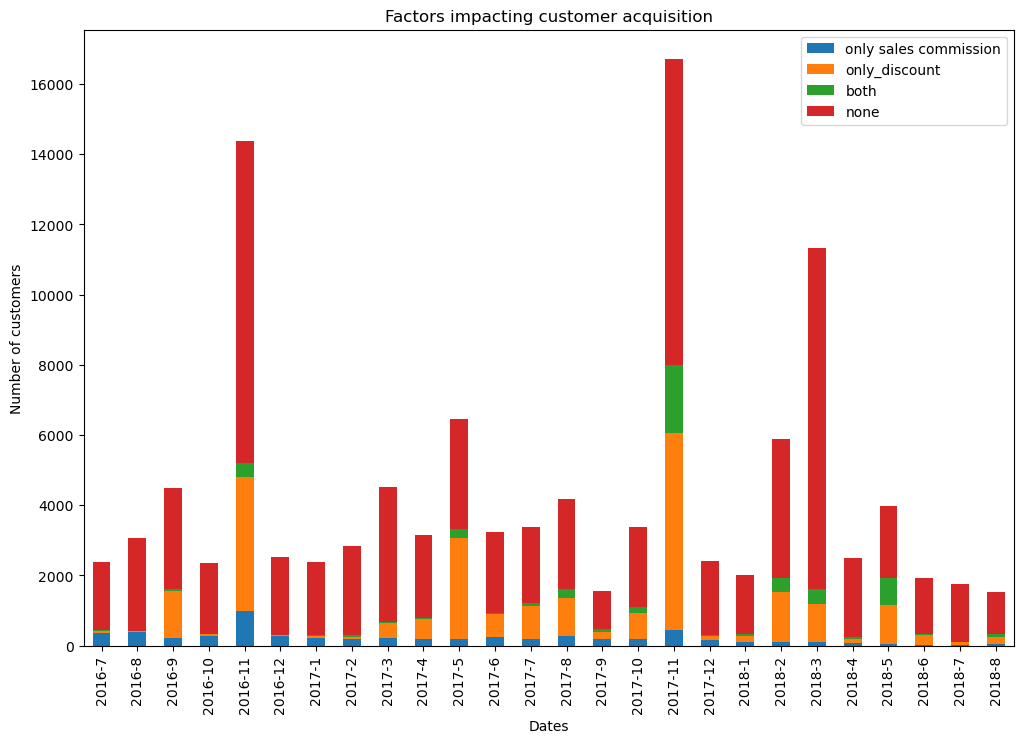

In [41]:
#create a time column that make sures that year has a higher importance than month
time = 100*data["Year"]  + data["Month"]
data["time"] = time
#sort by time
data = data.sort_values(by="time")
#first instance of client in this time sorted data frame
first_indices = data.drop_duplicates(subset='Customer ID', keep='first').index
#only includes first instance of client
temp_data = data.loc[first_indices]
grp = temp_data.groupby("Customer Since")[["discount_amount", "sales_commission_code","item_id", "grand_total"]].agg({
    #first loc to limit data frame to the indices of this group with sales commision, second loc to find absence of dicount
    "sales_commission_code": lambda x: temp_data.loc[(x.index[(x != "\\N")])].loc[(temp_data["discount_amount"] == 0)].shape[0],
    #first loc to limit data frame to the indices of this group with discount, second loc to find absence of sales commision
    "discount_amount": lambda x:temp_data.loc[(x.index[(x > 0)])].loc[(temp_data["sales_commission_code"] == "\\N")].shape[0],
    #first loc to limit data frame to the indices of this group with no discount, second loc to find absence of sales commision
    "grand_total": lambda x: temp_data.loc[(x.index)].loc[(temp_data["discount_amount"] > 0) & (temp_data["sales_commission_code"] != "\\N")].shape[0],
    #total number of clients that got in a month, works because only first instance of a client in the data frame
    "item_id": "count",
})
#rename columns
grp.columns = ["only sales commission", "only_discount", "both","none"]
grp["none"] = grp["none"] -grp["only sales commission"]-grp["only_discount"]-grp["both"]
grp = grp.sort_index(key=lambda x: pd.to_numeric(x.str.split("-").str[0] + "00") + pd.to_numeric(x.str.split("-").str[1]))
ax = grp.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Factors impacting customer acquisition')
plt.xlabel('Dates')
plt.ylabel('Number of customers')
plt.show()

# Explanation of the code section and plots below

**We categorise customers on the basis of how often they order. One of the important observations is the stark difference between the extremes of these categories. Also the percentage of regular repeat customers is not that high, when one quarter of the orders are placed by the customer categories that account for only 1.1 percent of total customers.                                        Note: (a <= x <= b) specifes a category which includes all customers that ordered between a to b number of times inclusive**

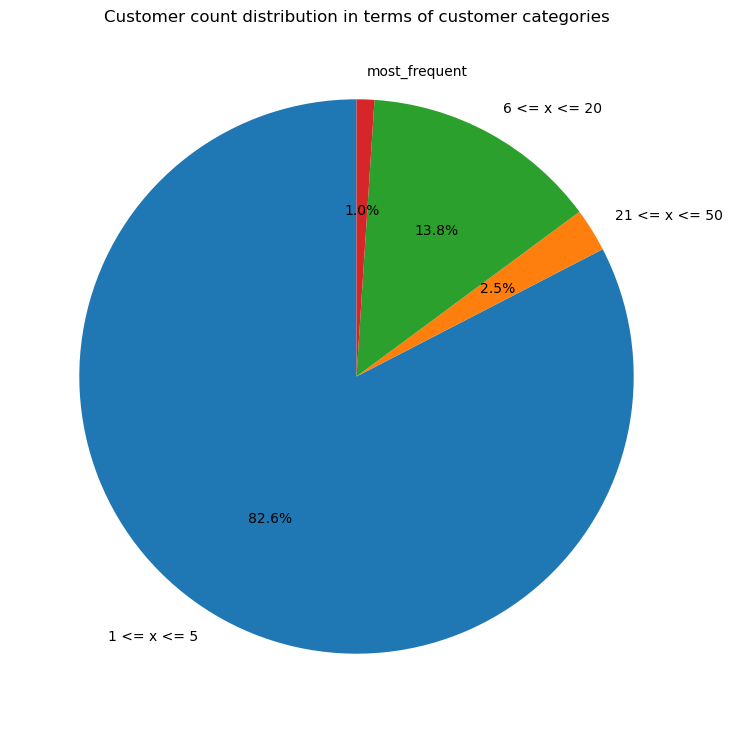

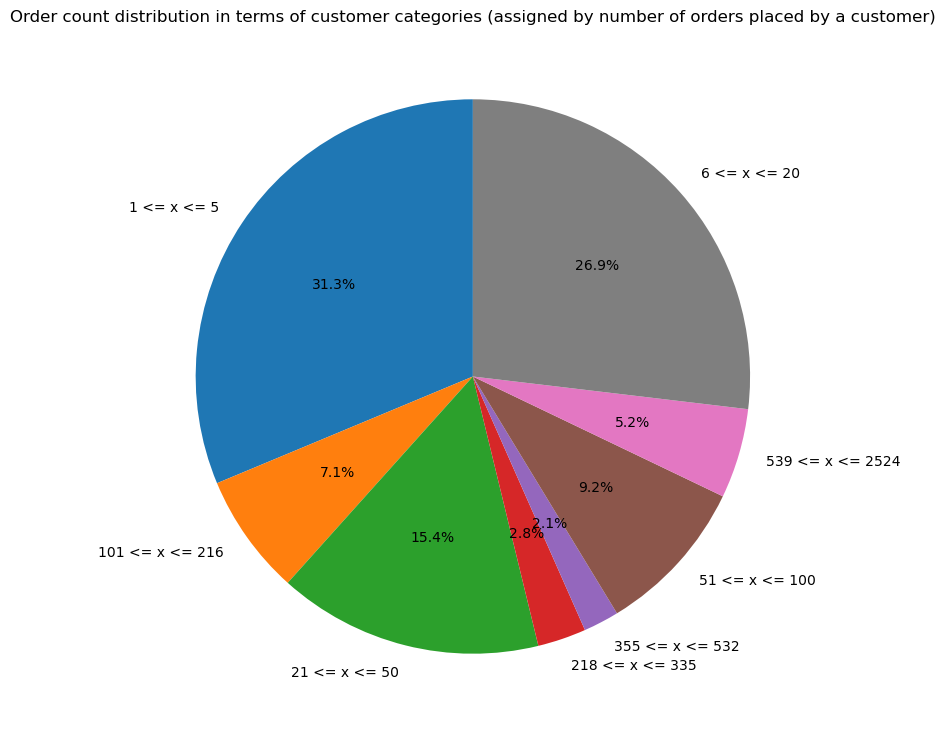

In [42]:
import seaborn as sns
# want to find percentage of complete orders and total orders for each customer, use groupby and a custom function to do it
grp_df = data.groupby("Customer ID")[["item_id","status"]].agg(
    {
    "status": lambda x: (x == "complete").sum()/x.shape[0],
    "item_id": "count",
}
)
#new series that hold order count for each customer, convert it to df so could just merge on one coulmn
new_s = grp_df["item_id"]
new_s = new_s.reset_index()
new_s.columns = ["Customer ID","order_count"]
#add order count correctky alligned to each customer
new_data = pd.merge(data,new_s, on='Customer ID')
#adding an new empty column to my df
new_data["customer_category"] = pd.Series([None]*new_data.shape[0])
# status in grp_df has percentage of complete order, want to categorise by order count that is why group on it. using median because mean gave a little skewed result for catgeories with less cutomers
grp_df2 = grp_df.groupby("item_id")["status"].agg('median')
#sort because in for loop, use sorted property to assign values to bin
ind = grp_df2.index.sort_values().to_list()
final_y = (grp_df2[ind]).to_list()
new_y = []
new_x = []
#arbitrary bin size
bins = [5,15,30 ,50,100,50, 25,30]
count = 0
for i in bins:
    sum = 0
    # find average completion status for each category
    for j in range(i):
        sum = sum + final_y[count+j]
    index = (new_data["order_count"] <= ind[count+i-1]) & (new_data["order_count"] >= ind[count])
    new_data.loc[index,"customer_category"] = f'{ind[count]} <= x <= {ind[count + i-1]}'
    new_y.append(sum/i)
    new_x.append(f'{ind[count]} <= x <= {ind[count + i-1]}')
    count = count + i
##############################################################################################
#finding number of cutomers in each category
df_group = new_data.groupby("customer_category")["Customer ID"].agg(lambda x: x.unique().shape[0])
# put all categories contributing less than 1.5 percent in the other category
ind = df_group/df_group.sum() < 0.015
dumy = df_group[ind].sum()
#new series to account for categories accounting for less than 1.5 percent
new_s = pd.Series([dumy], index = ["most_frequent"])
df_group = pd.concat([df_group, new_s])
#making index series to include the newly created category
ind = pd.concat([ind, pd.Series([False], index = ["most_frequent"])])
plt.figure(figsize=(9,9))
plt.pie(df_group.values[~ind], labels=df_group.index[~ind], autopct='%1.1f%%', startangle=90)
plt.title("Customer count distribution in terms of customer categories")
plt.show()

df_group = new_data.groupby("customer_category")["grand_total"].count()
plt.figure(figsize=(9,9))
plt.pie(df_group.values, labels=df_group.index, autopct='%1.1f%%', startangle=90)
plt.title("Order count distribution in terms of customer categories (assigned by number of orders placed by a customer)")
plt.show()

#Explanation for the codeblock and the plots below
**We try to see the impact of client category on the liklihood of the order getting completed**

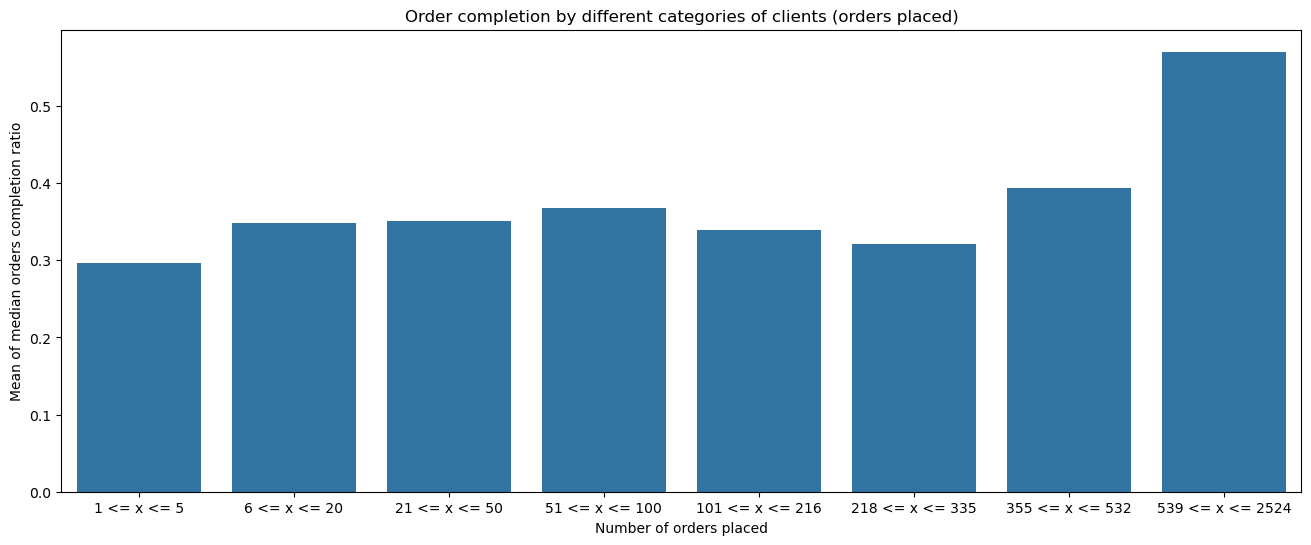

In [43]:



plt.figure(figsize=(16,6))
#using variables from previous block
sns.barplot(x = new_x, y = new_y)
plt.xlabel("Number of orders placed")
plt.ylabel("Mean of median orders completion ratio")
plt.title("Order completion by different categories of clients (orders placed)")
plt.show()

#Explaination of the codeblock and plots below

**In the plots below we observe the changes in shopping cart with respect to customer categories. We observe that even though other than last category (to the right) all other have similar mean cart values, categories 1-5 and 51-100 are more spread out in terms of its distribution around the median shopping cart value. All of the categories other than the last two have significant number of outliers depicted by long tails. These plots help us understand spending patterns of our customer categories**

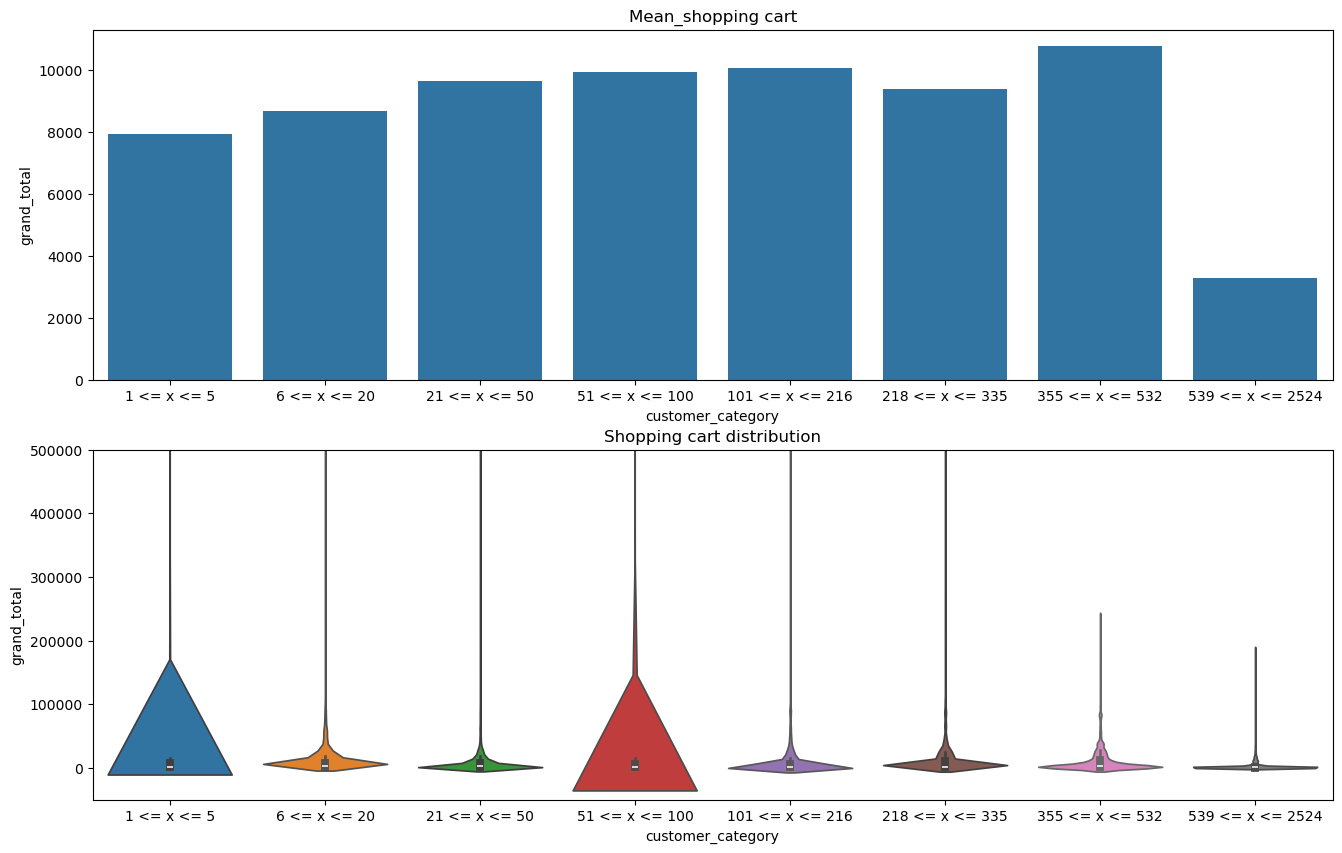

In [44]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
#find mean of shopping cart of each customer category
n_grp = new_data.groupby("customer_category")["grand_total"].mean()
#sorting by keys, so in x axis categpries become less regular buyers to more regular buyers from left to right
n_grp = n_grp.sort_index(key=lambda x: pd.to_numeric(x.str.split().str[0]))
sns.barplot(x = n_grp.index, y=n_grp)
plt.title("Mean_shopping cart")

plt.subplot(2,1,2)
plt.title("Shopping cart distribution")
new_data.dropna()
#finding names of all customer categories
dumm = (new_data["customer_category"].unique()).tolist()
index = sorted(dumm,key=lambda x: int(x.split()[0]))

for i in range(len(index)):
    #locate each category in dataframe and then plot its cart size (grand_total) distribution
    plotable = new_data.loc[(new_data["customer_category"] == index[i]) & (new_data["grand_total"] > 0),["grand_total","customer_category"]]
    sns.violinplot(x="customer_category",y = "grand_total", data = plotable)
    #some outliers, if we do not limit y axis can not understand the important part of the distribution, only tail remains visible
    plt.ylim(-50000,500000)

# Explanation for the code block and plots below

**The pie charts below explore the relationship between customer categories and the product categories they order. we observe that customers that order very frequently, have much lower percentage of
'Mobile and tablet" incomparison to the averge and a higher percentage of categories such as "beauty and grooming", "soghaat", "Women's Fashion" and "Men's Fashion". There is a possibility that these customers are actually other offline or online retailers (possibly small). We also abserve that "super store" and "soghaat" categories are quite popular among regular organic repeat customers (incomparison to its overall share).**

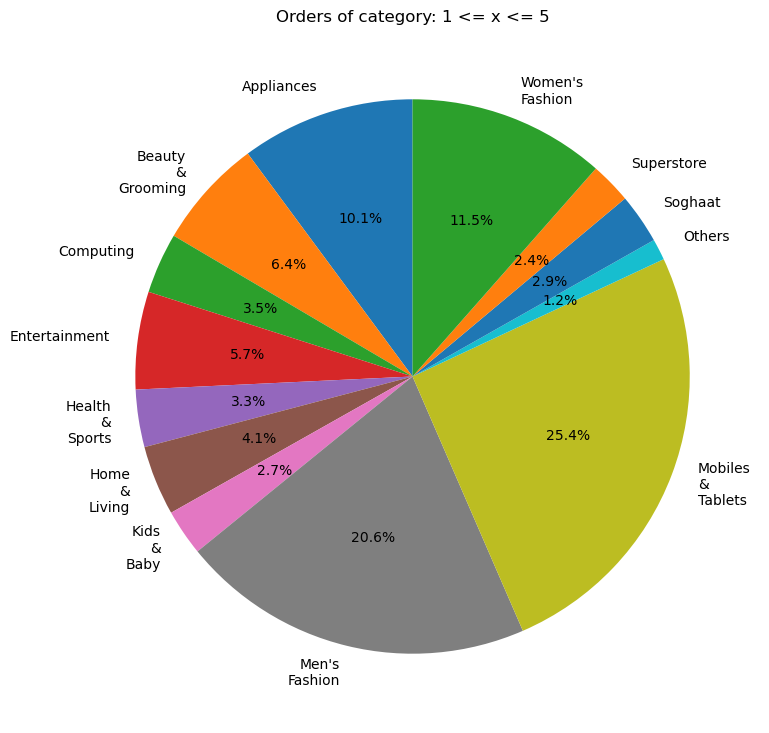

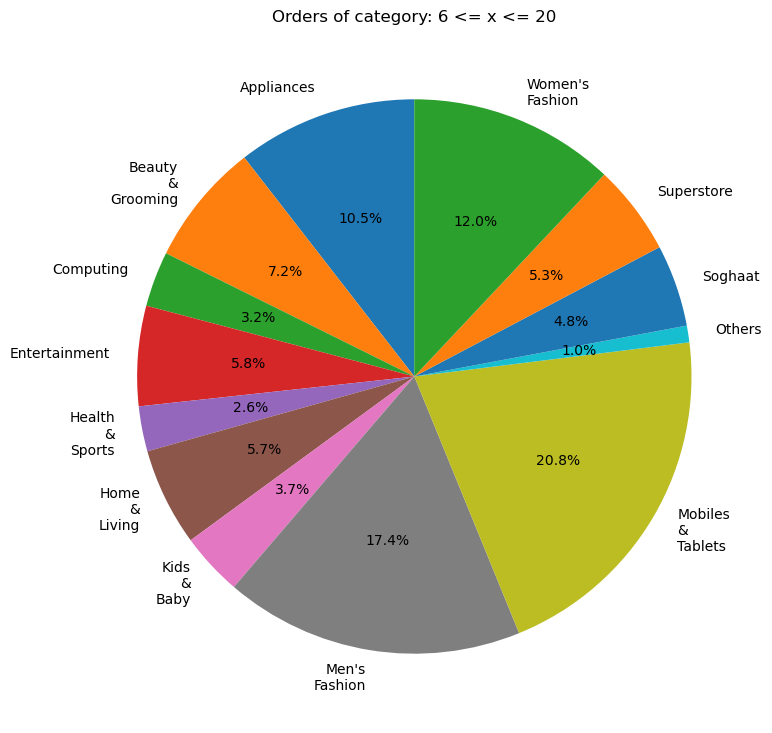

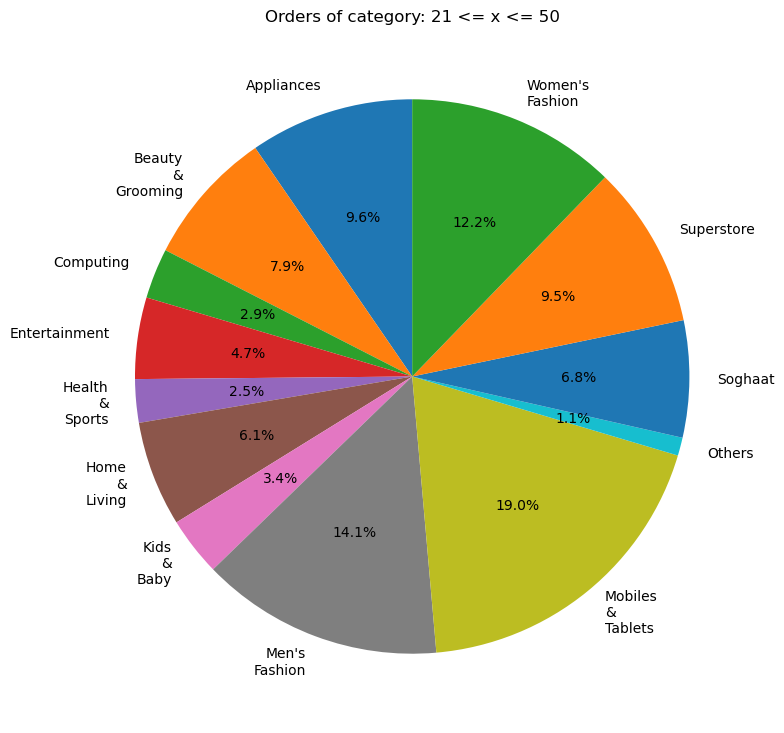

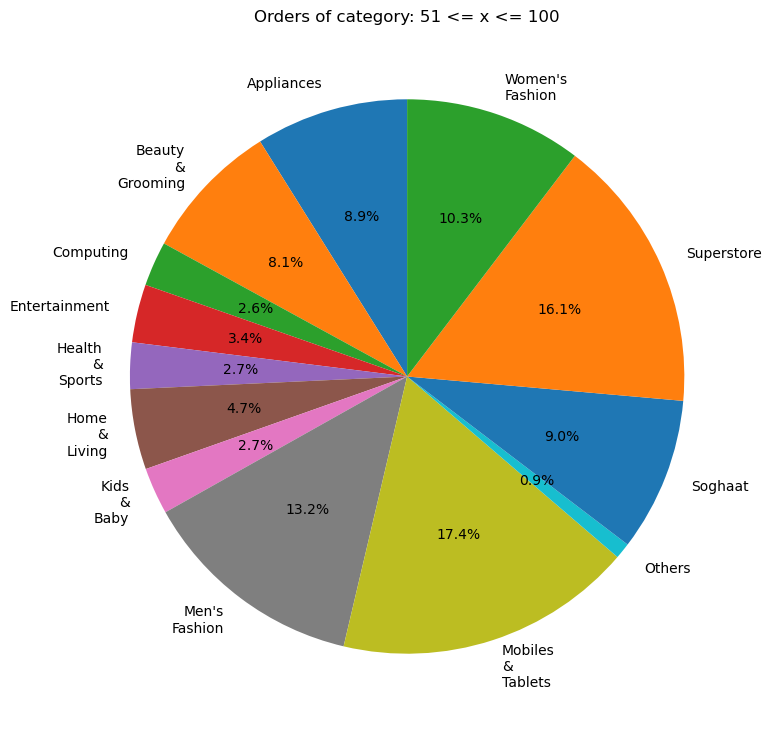

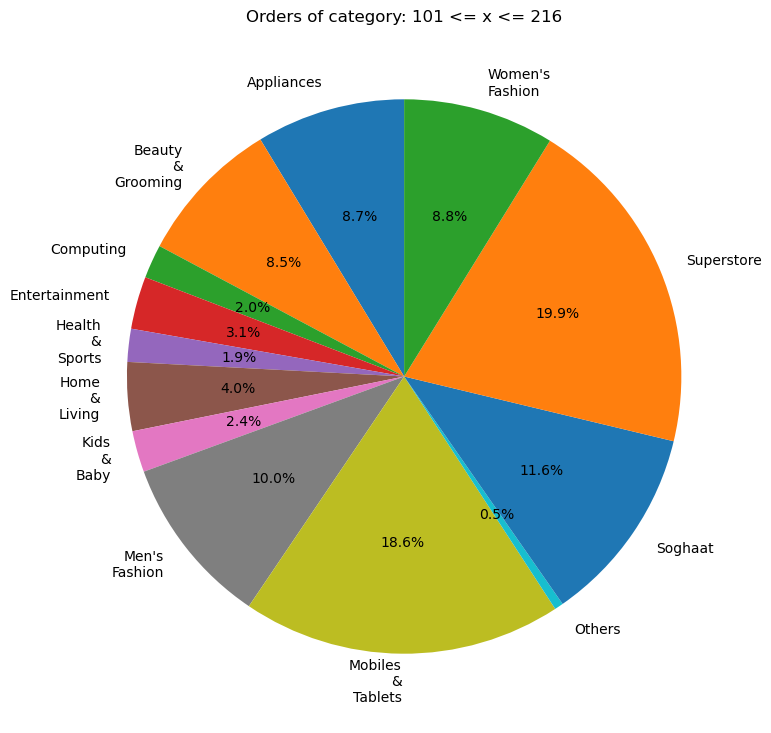

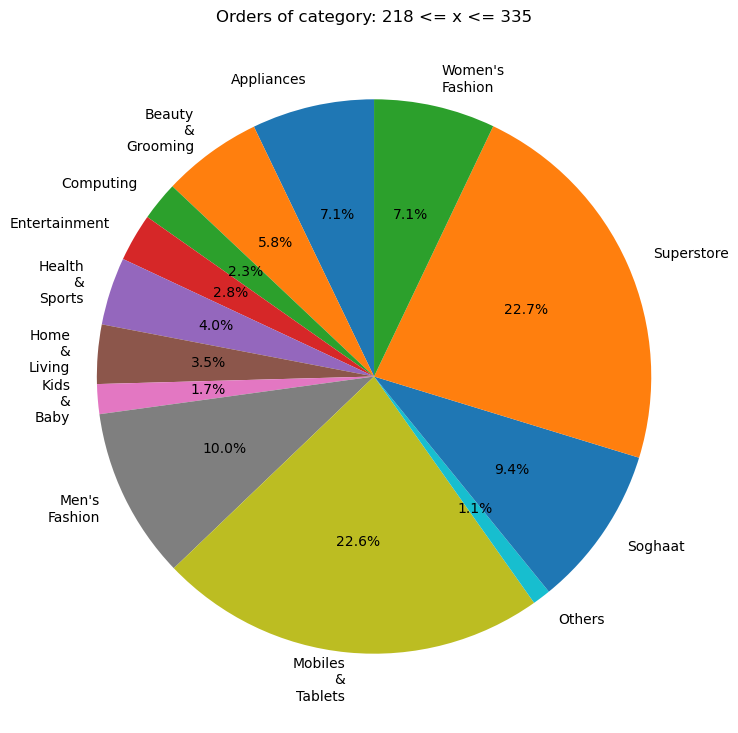

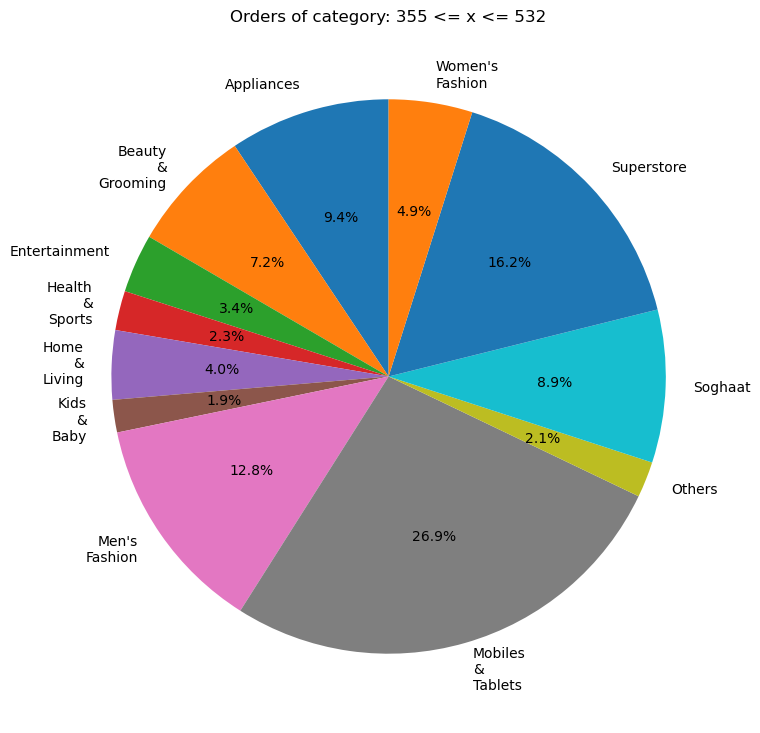

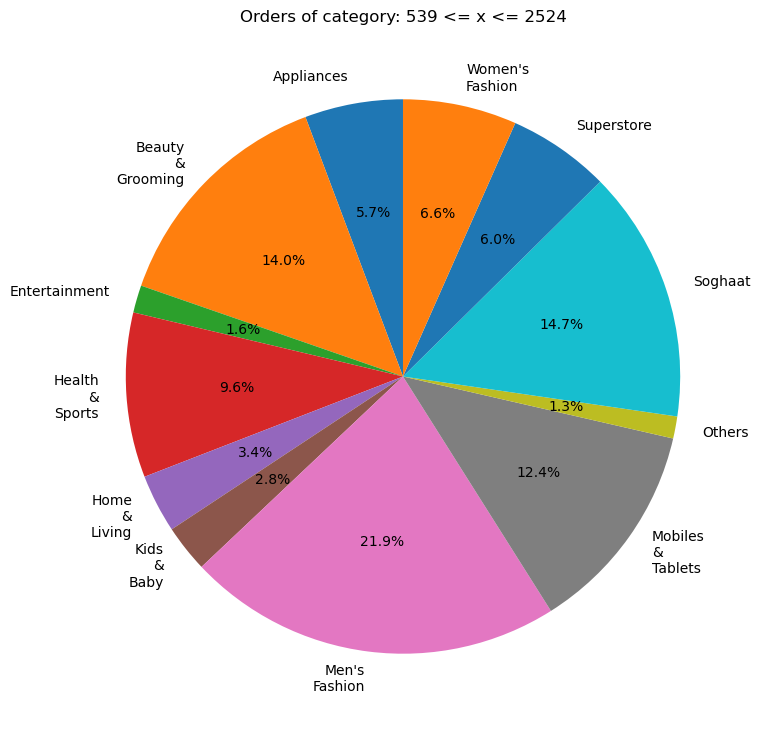

In [45]:
# make a pivot table to index using "customer_category and product category"
table = new_data.pivot_table(values='item_id', index='customer_category', columns='category_name_1', aggfunc='count')
c = 1
for i in index:
  plt.figure(figsize = (9,9))
  #any product that accounts for less than 1.5 percent is included in the other category (to avoid cluttering of the pie chart)
  ind = table.loc[i]/table.loc[i].sum() < 0.015
  dumy = table.loc[i]
  dumy["Others"] = dumy[ind].sum()
  ind["Others"] = False
  plt.pie(dumy[~ind], labels=table.columns[~ind], autopct='%1.1f%%', startangle=90)
  plt.title("Orders of category: "+i)

#explanation for the code block and plots below
**From this point onwards we categorise customers on the basis of there spending habbits.We explore the share of each category in total customers and the total orders. Note: (a <= price <b) specifies a category which inludes all customers which have an average shopping cart size in this range**

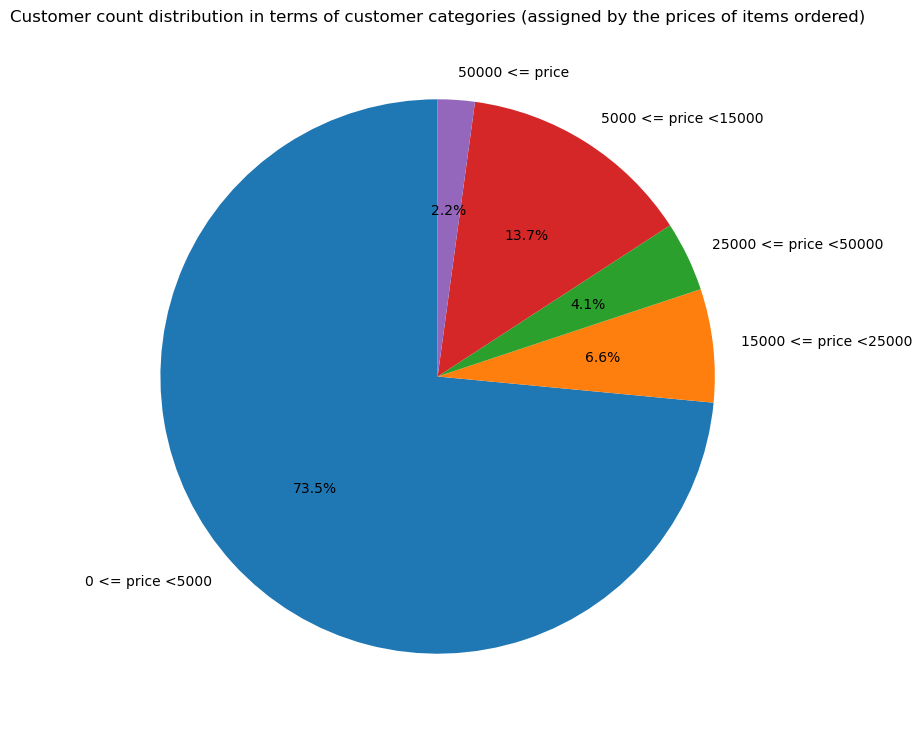

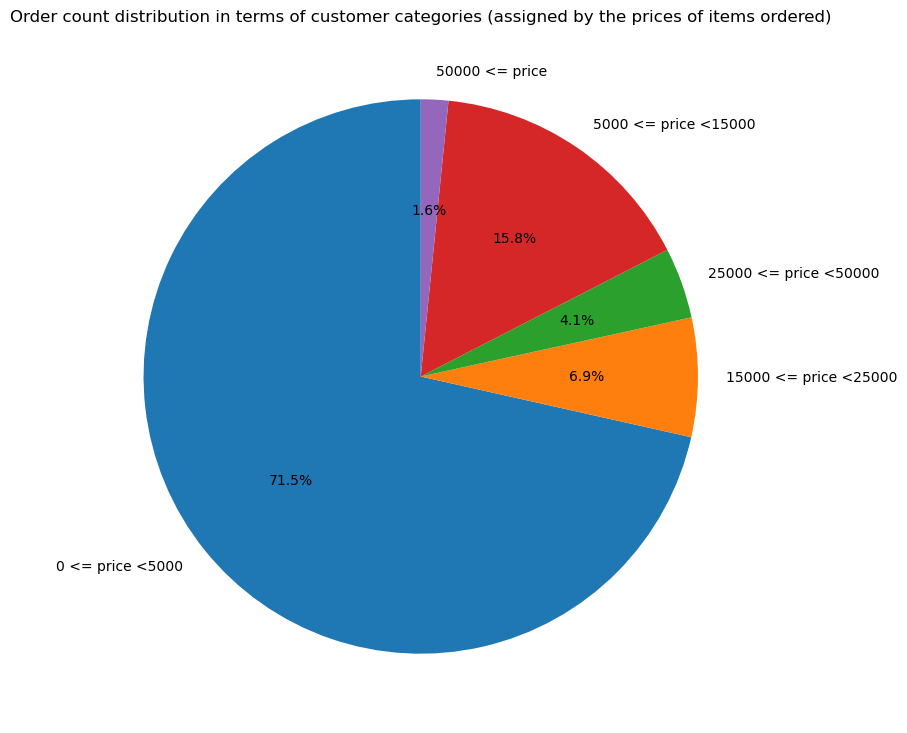

In [46]:
import numpy as np
# creating a series that hold the price(not grand_total, price of one individual product) of average order by each unique client
new_group = new_data.groupby("Customer ID")["price"].mean()
new_group = pd.DataFrame(new_group)
new_group.columns = ["avg_price"]
#merging with original data frame to allign average oder price with correct customer ids
new_data = pd.merge(new_data,new_group, left_on="Customer ID", right_on = new_group.index)

#assign to new values to the column "customer category" using the avg_price column
new_data.loc[new_data["avg_price"] < 5000,"customer_category"] = "0 <= price <5000"
new_data.loc[(new_data["avg_price"] < 15000) & (new_data["avg_price"] >= 5000),"customer_category"] = ("5000 <= price <15000")
new_data.loc[(new_data["avg_price"] < 25000) & (new_data["avg_price"] >= 15000),"customer_category"] = ("15000 <= price <25000")
new_data.loc[(new_data["avg_price"] < 50000) & (new_data["avg_price"] >= 25000),"customer_category"] = ("25000 <= price <50000")
new_data.loc[(new_data["avg_price"] >= 50000),"customer_category"] = ("50000 <= price")

##############################################################################################################################

#plot pie chart of customer distribution, have grouped on customer_category and have counted unique customer IDs in each group
df_group = new_data.groupby("customer_category")["Customer ID"].agg(lambda x: x.unique().shape[0])
plt.figure(figsize=(9,9))
plt.pie(df_group.values, labels=df_group.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer count distribution in terms of customer categories (assigned by the prices of items ordered)")
plt.show()

#plot pie chart order count distribution among customer categories
df_group = new_data.groupby("customer_category")["grand_total"].count()
plt.figure(figsize=(9,9))
plt.pie(df_group.values, labels=df_group.index, autopct='%1.1f%%', startangle=90)
plt.title("Order count distribution in terms of customer categories (assigned by the prices of items ordered)")
plt.show()

#Explanation for Code block and plots below

**We observe that orders from low spending customers have higher rate of completion, could be influenced by factors such as competetive prices on the website. Further analysis is required to see any causal relationship between low-spending customers and completion rate. currently data could have been influenced by a possible fork, price influences category and price infuences completion rate. low spending customers can be more risk averse so there is also a possibilty that they only order after great consideration hence higher completion rate.**   

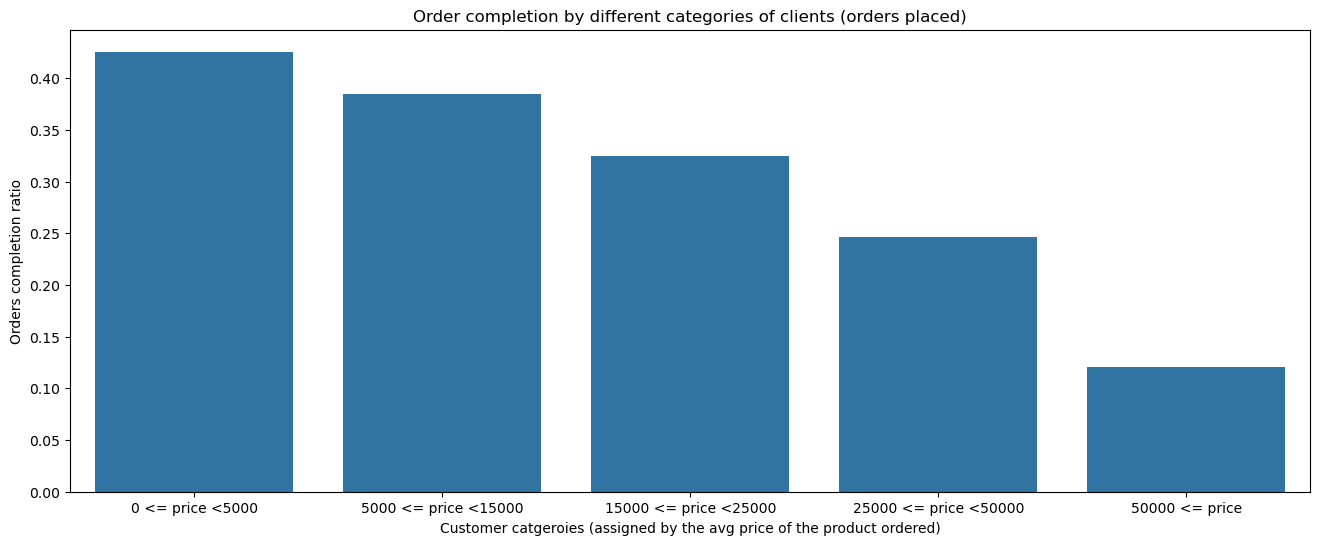

In [47]:
#create a series that has the percentage of orders that are successul for each category(index)
this_grp = new_data.groupby("customer_category")["status"].agg(lambda x: (x == "complete").sum()/x.shape[0])
this_grp = this_grp.sort_index(key=lambda x: pd.to_numeric(x.str.split().str[0]))
plt.figure(figsize=(16,6))
sns.barplot(x = this_grp.index, y = this_grp)
plt.xlabel("Customer catgeroies (assigned by the avg price of the product ordered)")
plt.ylabel("Orders completion ratio")
plt.title("Order completion by different categories of clients (orders placed)")
plt.show()


#explanation for the code block and plots below

**The pie charts below explore what products different categories of customers order. We observe that as the avg price of the order increases so does the percentage of mobile and tablets. This help us see that the other important categories such as "Men's fashion" and "women's fashion" are largely baught by relatively low spending customers. Also significant percentage of mobile and tablets in the 5-15 thousand category shows a huge demand for cheap phones.**

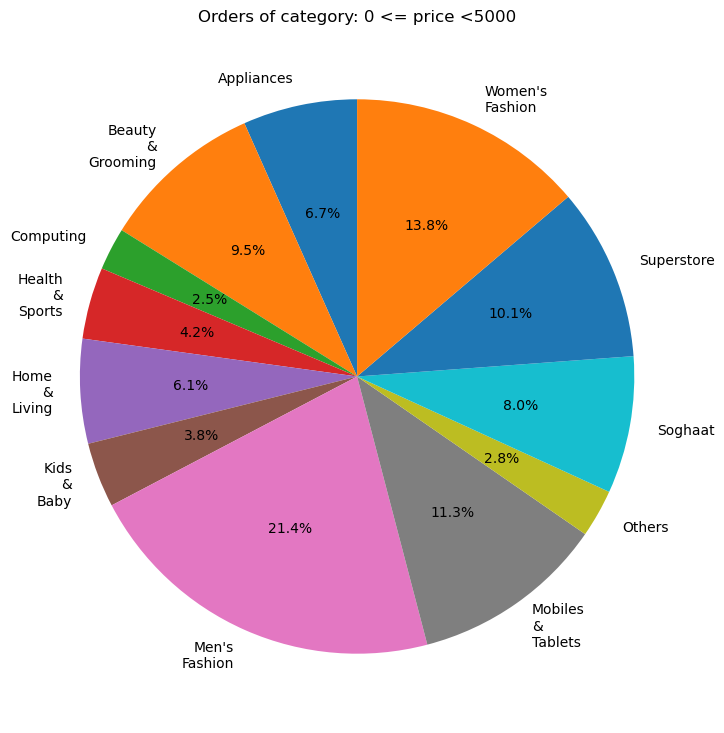

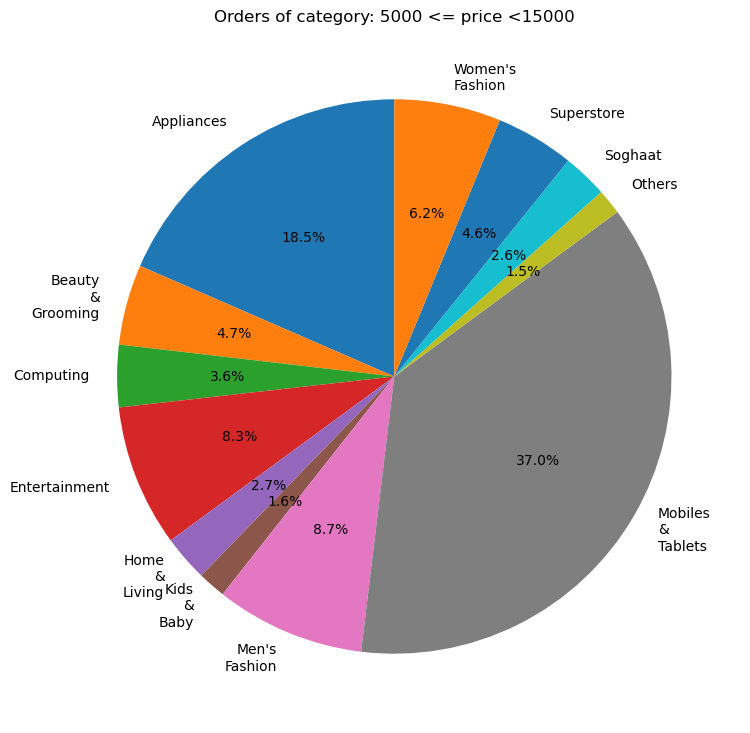

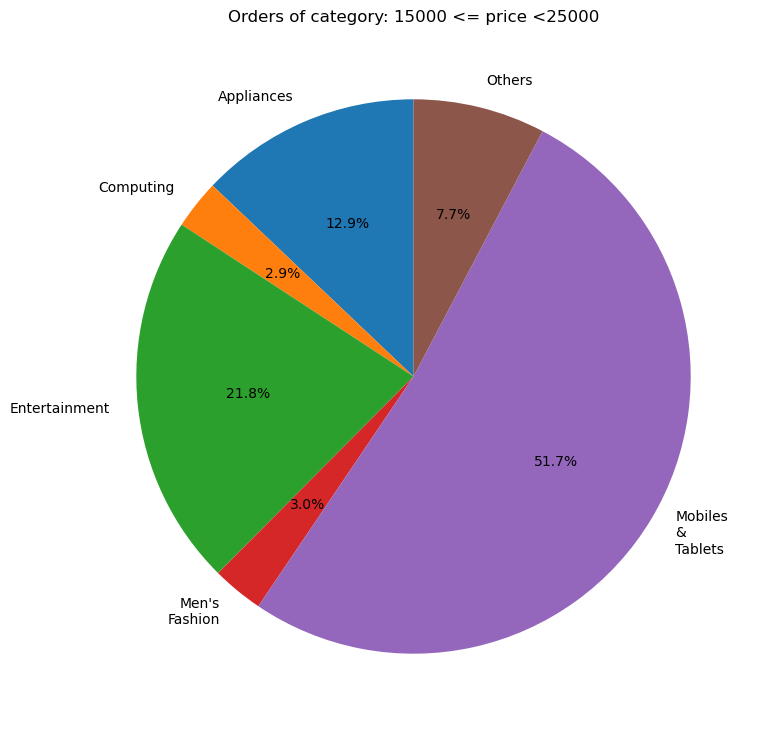

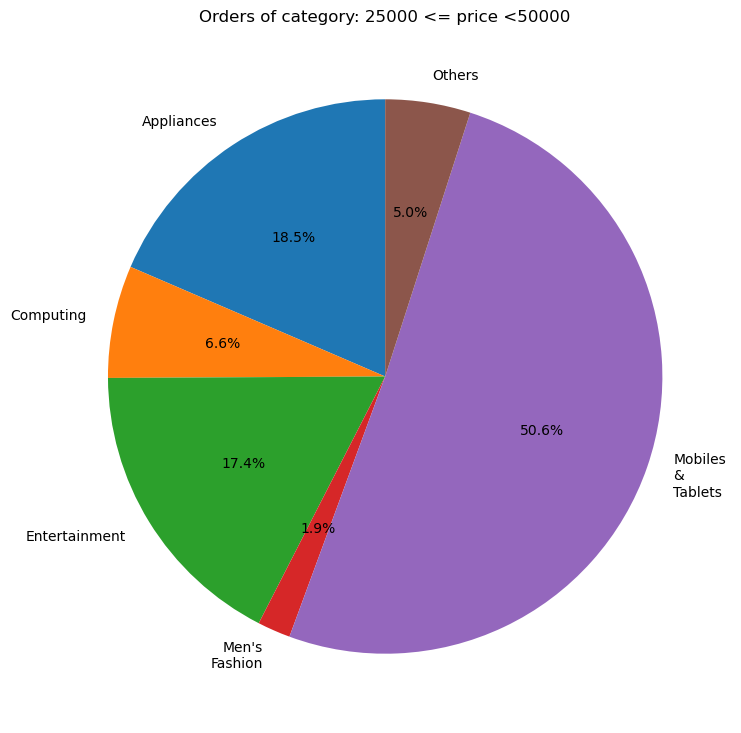

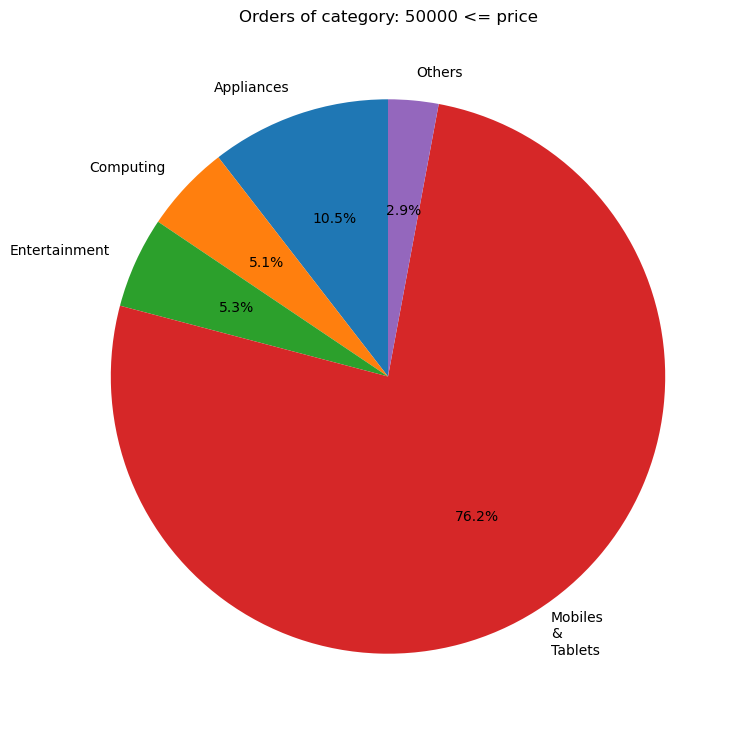

In [48]:
# make a pivot table to index using "customer_category and product category"
table = new_data.pivot_table(values='item_id', index='customer_category', columns='category_name_1', aggfunc='count')
c = 1
table = table.sort_index(key=lambda x: pd.to_numeric(x.str.split().str[0]))
for i in table.index:
 # print(i)
  plt.figure(figsize = (9,9))
  #any product that accounts for less than 1.5 percent is included in the other category (to avoid cluttering of the pie chart)
  ind = table.loc[i]/table.loc[i].sum() < 0.015
  dumy = table.loc[i]
  dumy["Others"] = dumy[ind].sum()
  ind["Others"] = False
  plt.pie(dumy[~ind], labels=table.columns[~ind], autopct='%1.1f%%', startangle=90)
  plt.title("Orders of category: "+i)